# Aproximación de Soluciones de Ecuaciones Diferenciales, utilizando Redes Neuronales

Investigación acerca del uso de redes neuronales para la aproximación de soluciones de ecuaciones diferenciales, iniciado como parte de una iniciación científica por profesores del Centro de Docencia de Ciencias Básicas para Ingeniería, de la Universidad Austral de Chile.

Profesores responsables: 

* **Juan Concha**

* **Daniel Sánchez**

---
## Bibliotecas

* ~~SciANN (Python)~~

* DeepXDE (Python)

* NeuralPDE.jl (Julia)


---
## Importante

Para el caso de SciANN y DeepXDE, ambos deben ser instalados en entornos virtuales distintos por la incompatibilidad de versiones entre Tensorflow y Keras.

Para ejecutar NeuralPDE.jl, se realizaron pruebas en un sistema Debian (GNU/Linux).

### Versión de Python utilizada para MacOS: Python 3.10.16

* Para instalar la versión dentro de un entorno ya creado a través de Conda:

``` bash 
conda install python=3.10  
```

* Para verificar la versión instalada:

``` bash 
python --version
```

### Versión de Python utilizada para Debian (GNU/Linux): Python 3.11.2


* Para verificar la versión instalada:

``` bash 
python --version
```

**Nota: Los códigos acá presentes se ejecutan dentro de un entorno virtual, con versiones específicas de Tensorflow, Keras y SciANN.**

### Versión de Julia utilizada para MacOS y Debian (GNU/Linux): Julia 1.11.5

* Para descargar Julia, ingrese al link https://julialang.org/downloads/

* Para verificar la versión instalada:

``` bash 
julia --version
```

## Versión de NeuralPDE.jl utilizada: NeuralPDE v5.18.1



---
## Instalación de SciANN

1. Instalar Tensorflow (2.10.1)

``` bash 
pip install "tensorflow>=2.10,<2.11" 
```

2. Instalar Keras (2.10.0)

``` bash 
pip install "keras<3.0,<2.11" 
```

3. Instalar SciANN (0.7.0.1)

``` bash 
pip install sciann 
```

4. Instalar Matplotlib (3.10.3)

``` bash 
pip install matplotlib 
```

## Instalación de DeepXDE

1. Instalar la última versión de DeepXDE. Para este trabajo (mayo de 2025), se ha utilizado la versión **1.14.0**

``` bash 
pip install deepxde
```

2. Instalar Tensorflow (2.19.0) (la ultima version disponible)

``` bash 
pip install tensorflow 
```

2. Instalar Keras (3.10.0) (la ultima version disponible)

``` bash 
pip install keras
```

4. Instalar Matplotlib (la ultima version disponible)

``` bash 
pip install matplotlib 
```

---
# Ejemplo 1: Resolución de una EDO Lineal de Primer Orden

Corresponde a un simple problema con solución analítica, implementada para probar la biblioteca SciANN.

Ecuación 1:

$$ \dfrac{dy}{dx} + y = 0, \quad y(0) = C$$

<!-- <p align="center">
    <img src="Ejemplo-1/Ecuacion1.png" alt="Ejemplo 1" width="80%" />
</p> -->

Solución general:

$$y(x) = C \cdot e^{-x}$$

<!-- <p align="center">
    <img src="Ejemplo-1/Ecuacion2.png" alt="Ejemplo 1" width="60%" />
</p> -->

Con $C$ una constante.

Una vez obtenida la predicción de la solución para la Ecuación 1, se realiza la gráfica (utilizando Matplotlib) para $C = 1$, $C = 2$, $C = 3$, $C = 4$, $C = 5$.

Las curvas generadas por SciANN están en los colores indicados. La curva de la solución exacta está en color negro.

<!-- <p align="center">
    <img src="Ejemplo-1/Ejemplo1.png" alt="Ejemplo 1" width="80%" />
</p> -->

## Código y Ejecución


2025-05-13 15:03:24.789980: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


---------------------- SCIANN 0.7.0.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.10.1 
Python Version: 3.10.16 (main, Dec 11 2024, 10:24:41) [Clang 14.0.6 ] 


Total samples: 5000 
Batch size: 256 
Total batches: 20 



2025-05-13 15:03:34.815300: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-13 15:03:34.833684: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


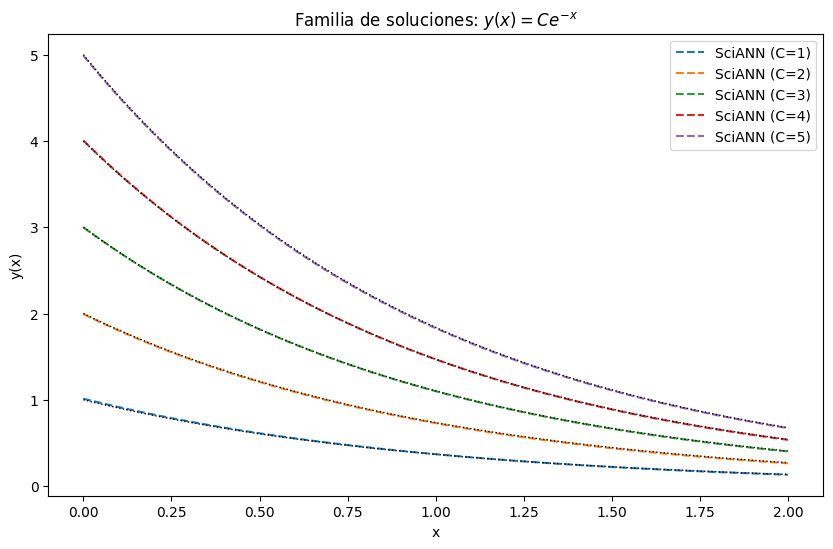

In [3]:
import sciann as sn
import numpy as np
import matplotlib.pyplot as plt

# Definir variables
x = sn.Variable('x', dtype='float32')
C = sn.Variable('C', dtype='float32')  # Constante para la familia de soluciones

# Red neuronal para aproximar y(x; C)
y = sn.Functional('y', [x, C], 4*[20], activation='tanh')

# Derivada dy/dx
dydx = sn.diff(y, x)

# Ecuación diferencial: dy/dx + y = 0
ode = dydx + y

# Condición inicial: y(0; C) = C
IC = (1 - sn.sign(x - 0.01)) * (y - C)

# Modelo
model = sn.SciModel(
    inputs=[x, C],
    targets=[ode, IC],
    loss_func="mse",
    optimizer="adam",
)

# Datos de entrenamiento (x ∈ [0, 2], C ∈ [0.5, 5])
x_train = np.linspace(0, 2, 100)
C_train = np.linspace(0.5, 5, 50)
X, Cc = np.meshgrid(x_train, C_train)
X_flat = X.reshape(-1, 1)
Cc_flat = Cc.reshape(-1, 1)

# Entrenamiento
model.train(
    [X_flat, Cc_flat],
    ['zeros', 'zeros'],
    epochs=500,
    batch_size=256,
    verbose=0
)

# Predicción para C = 1, 2, 3, 4, 5
x_test = np.linspace(0, 2, 100)
C_test = [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 6))
for c in C_test:
    # Solución numérica con SciANN
    y_pred = y.eval(model, [x_test, c * np.ones_like(x_test)])
    # Solución analítica utilizando 
    y_exact = c * np.exp(-x_test)
    plt.plot(x_test, y_pred, '--', label=f'SciANN (C={c})')
    plt.plot(x_test, y_exact, 'k:', linewidth=1)

plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Familia de soluciones: $y(x) = C e^{-x}$')
plt.legend()
plt.show()




Total samples: 20 
Batch size: 20 
Total batches: 1 



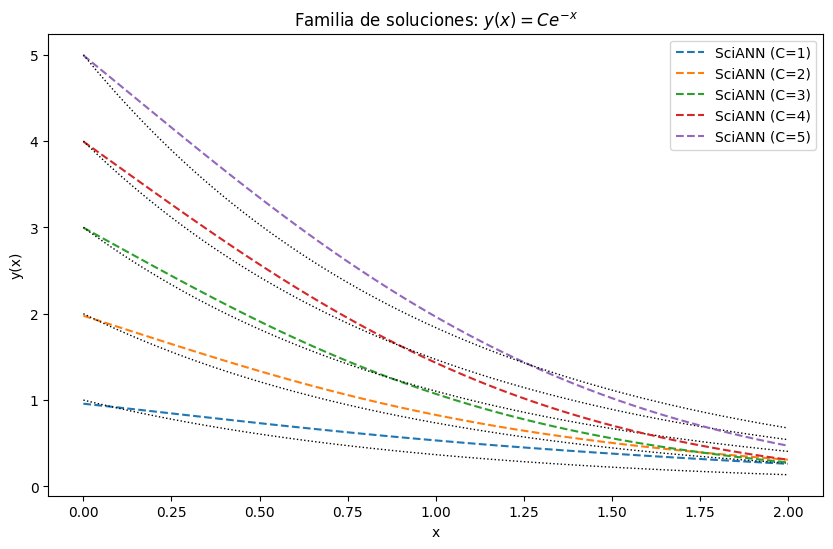

In [59]:
import sciann as sn
import numpy as np
import matplotlib.pyplot as plt

# Definir variables
x = sn.Variable('x', dtype='float32')
C = sn.Variable('C', dtype='float32')  # Constante para la familia de soluciones

# Red neuronal para aproximar y(x; C)
# y = sn.Functional('y', [x, C], 4*[20], activation='tanh')
y = sn.Functional('y', [x, C], 4*[20], activation='swish')

# Derivada dy/dx
dydx = sn.diff(y, x)

# Ecuación diferencial: dy/dx + y = 0
ode = dydx + y

# Condición inicial: y(0; C) = C
# IC = (1 - sn.sign(x - 0.01)) * (y - C)
IC_weight = 10.0  # Peso ajustable
IC = IC_weight * sn.exp(-100 * x**2) * (y - C)


# Modelo
model = sn.SciModel(
    inputs=[x, C],
    targets=[ode, IC],
    loss_func="mse",
    optimizer="adam",
)

# Datos de entrenamiento (x ∈ [0, 2], C ∈ [0.5, 5])
# Cambiar 100 y 50 por valores menores (ej: 20 y 5)
x_train = np.linspace(0, 2, 4)  # 20 puntos en x
C_train = np.linspace(0.5, 5, 5)  # 5 puntos en C
X, Cc = np.meshgrid(x_train, C_train)
X_flat = X.reshape(-1, 1)  # 20*5=100 muestras (total 100)
Cc_flat = Cc.reshape(-1, 1)

# Entrenamiento
model.train(
    [X_flat, Cc_flat],
    ['zeros', 'zeros'],
    epochs=300,
    batch_size=256,
    verbose=0
)

# Predicción para C = 1, 2, 3, 4, 5
x_test = np.linspace(0, 2, 100)
C_test = [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 6))
for c in C_test:
    # Solución numérica con SciANN
    y_pred = y.eval(model, [x_test, c * np.ones_like(x_test)])
    # Solución analítica utilizando 
    y_exact = c * np.exp(-x_test)
    plt.plot(x_test, y_pred, '--', label=f'SciANN (C={c})')
    plt.plot(x_test, y_exact, 'k:', linewidth=1)

plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Familia de soluciones: $y(x) = C e^{-x}$')
plt.legend()
plt.show()




Total samples: 100 
Batch size: 100 
Total batches: 1 



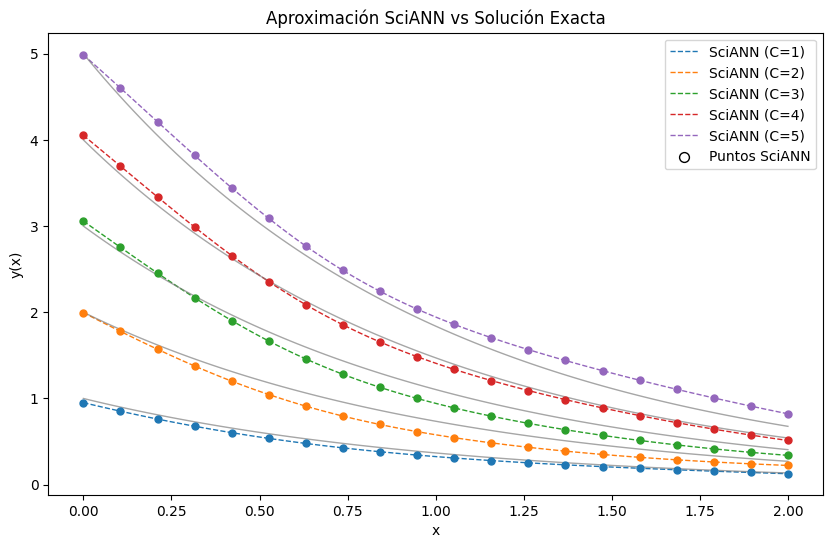

In [88]:
import sciann as sn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.activations import swish

# Definir variables
x = sn.Variable('x', dtype='float32')
C = sn.Variable('C', dtype='float32')

# Red neuronal con activación swish
y = sn.Functional('y', [x, C], 4*[20], activation=swish)

# Derivada y ecuación diferencial
dydx = sn.diff(y, x)
ode = dydx + y

# Condición inicial suavizada con mayor peso
IC_weight = 10.0  
IC = IC_weight * sn.exp(-100 * x**2) * (y - C)

# Modelo
model = sn.SciModel(
    inputs=[x, C],
    targets=[ode, IC],
    optimizer="adam",
)

# Datos de entrenamiento (5 puntos en x, 5 en C)
x_train = np.linspace(0, 2, 20)  
C_train = np.linspace(0.5, 5, 5)  
X, Cc = np.meshgrid(x_train, C_train)
X_flat = X.reshape(-1, 1)  
Cc_flat = Cc.reshape(-1, 1)

# Entrenamiento
model.train(
    [X_flat, Cc_flat],
    ['zeros', 'zeros'],
    epochs=400,
    batch_size=512,
    verbose=0
)

# Predicción para C = 1, 2, 3, 4, 5
x_test = np.linspace(0, 2, 100)
C_test = [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 6))

for idx, c in enumerate(C_test):
    # Predicción de SciANN (curva y puntos)
    y_pred_curve = y.eval(model, [x_test, c * np.ones_like(x_test)])  # Curva suave
    y_pred_points = y.eval(model, [x_train, c * np.ones_like(x_train)])  # Puntos en x_train
    
    # Solución exacta (solo para referencia)
    y_exact = c * np.exp(-x_test)
    
    # Graficar CURVA de SciANN (--, color único por C)
    plt.plot(x_test, y_pred_curve, '--', linewidth=1, label=f'SciANN (C={c})')
    
    # Graficar PUNTOS de SciANN (mismo color que la curva)
    plt.scatter(
        x_train, 
        y_pred_points, 
        marker='o', 
        s=25,           # Tamaño de puntos
        # edgecolors='k',  # Borde negro
        zorder=3, 
        # Usar el color de la última curva (índice -1)
        color=plt.gca().lines[-1].get_color()  
    )
    
    # Solución exacta (línea gris delgada)
    plt.plot(x_test, y_exact, 'gray', linestyle='-', linewidth=1, alpha=0.7)

# Añadir leyenda solo para puntos (una vez)
plt.scatter([], [], marker='o', s=50, edgecolors='k', label='Puntos SciANN', facecolor='white')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Aproximación SciANN vs Solución Exacta')
plt.legend()
plt.show()


Compiling model...
Building feed-forward neural network...
'build' took 0.079120 s

'compile' took 0.659811 s



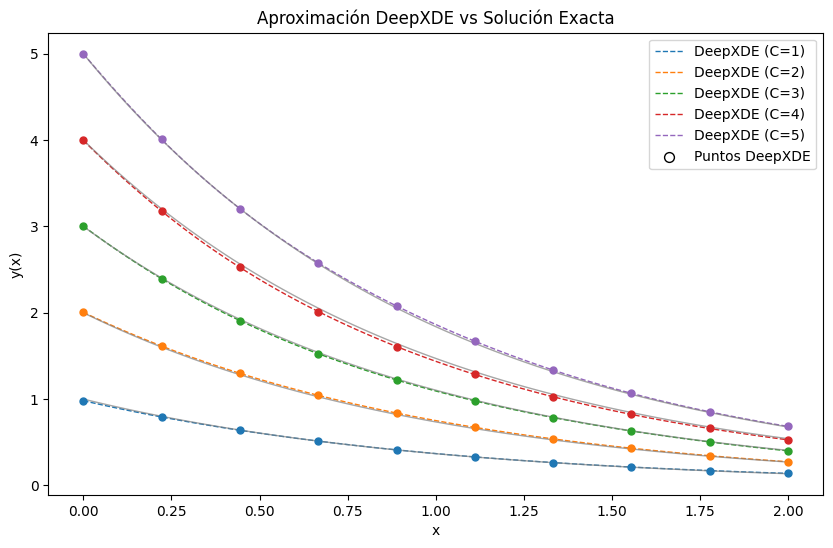

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import deepxde as dde

# Definir parámetros
IC_weight = 10.0

# Definir la ecuación diferencial
def pde(x, y):
    dy_dx = dde.grad.jacobian(y, x, i=0, j=0)
    residual_ode = dy_dx + y
    residual_ic = IC_weight * tf.exp(-100 * x[:, 0:1]**2) * (y - x[:, 1:2])
    return [residual_ode, residual_ic]

# Geometría 2D: x ∈ [0, 2], C ∈ [0.5, 5]
geom = dde.geometry.Rectangle([0, 0.5], [2, 5])

# Generar puntos de entrenamiento (iguales al código original)
x_train = np.linspace(0, 2, 10)
C_train = np.linspace(0.5, 5, 5)
X, Cc = np.meshgrid(x_train, C_train)
training_points = np.hstack((X.reshape(-1, 1), Cc.reshape(-1, 1)))

# Configurar datos PDE usando puntos específicos
data = dde.data.PDE(
    geom,
    pde,
    [],
    num_domain=0,
    anchors=training_points,
)

# Crear red neuronal
net = dde.maps.FNN(
    [2] + 4*[20] + [1],  # Capas: entrada 2, 4 ocultas de 20, salida 1
    "swish",
    "Glorot normal"
)

# Configurar modelo
model = dde.Model(data, net)
model.compile("adam", lr=0.01)

# Entrenamiento (400 épocas, batch completo)
losshistory, train_state = model.train(
    epochs=400,
    batch_size=training_points.shape[0],  # Usar todos los puntos en cada batch
    display_every=100,
    verbose=0
)

# Preparar datos para graficar
x_test = np.linspace(0, 2, 100)[:, None]
x_train_orig = x_train.reshape(-1, 1)
C_test_values = [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 6))

# Graficar resultados para cada C
for c in C_test_values:
    # Predecir curva suave
    test_points = np.hstack((x_test, c * np.ones_like(x_test)))
    y_pred = model.predict(test_points)
    plt.plot(x_test, y_pred, '--', linewidth=1, label=f'DeepXDE (C={c})')
    
    # Predecir puntos de entrenamiento
    test_points_train = np.hstack((x_train_orig, c * np.ones_like(x_train_orig)))
    y_pred_points = model.predict(test_points_train)
    plt.scatter(
        x_train_orig,
        y_pred_points,
        marker='o',
        s=25,
        zorder=3,
        color=plt.gca().lines[-1].get_color()
    )
    
    # Solución exacta
    y_exact = c * np.exp(-x_test)
    plt.plot(x_test, y_exact, 'gray', linestyle='-', linewidth=1, alpha=0.7)

# Configuración final del gráfico
plt.scatter([], [], marker='o', s=50, edgecolors='k', 
            label='Puntos DeepXDE', facecolor='white')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Aproximación DeepXDE vs Solución Exacta')
plt.legend()
plt.show()

In [85]:
!pip show deepxde

Name: DeepXDE
Version: 1.14.0
Summary: A library for scientific machine learning
Home-page: https://github.com/lululxvi/deepxde
Author: 
Author-email: Lu Lu <lululxvi@gmail.com>
License: LGPL-2.1
Location: /opt/miniconda3/envs/sci/lib/python3.10/site-packages
Requires: matplotlib, numpy, scikit-learn, scikit-optimize, scipy
Required-by: 


---
# Ejemplo 2: Comportamiento físico de un Circuito RC

Corresponde a un ejemplo de sistema eléctrico modelado, en el que se requieren soluciones **positivas**.

Orientado a modelar el comportamiento físico de un circuito RC no lineal, donde el voltaje del capacitor *V(t)* debe ser siempre positivo debido a la presencia de un diodo ideal. La ecuación diferencial incluye un término no lineal para modelar la disipación de energía, garantizando que *V(t)* sea mayor o igual a *0*.

Ecuación diferencial:

$$ \frac{dV}{dt} = -\frac{1}{RC} \cdot V^2 \quad\Leftrightarrow\quad \frac{dV}{dt} + \frac{1}{RC} \cdot V^2 = 0, \qquad V(0) = 5$$

donde

* $V(t)$: Voltaje en el capacitor (positivo por el diodo)  

* $R$: Resistencia no lineal (dependiente de $V$)  

* $C$: Capacitancia  

Solución analítica: $V(t) = \displaystyle\frac{V_0}{1 + \frac{V_0}{RC} t}$

<!-- <p align="center">
    <img src="Ejemplo-2/Ejemplo2.png" alt="Ejemplo 2" width="80%" />
</p> -->

## Código y Ejecución

---------------------- SCIANN 0.7.0.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.10.1 
Python Version: 3.10.16 (main, Dec 11 2024, 10:24:41) [Clang 14.0.6 ] 


Total samples: 200 
Batch size: 32 
Total batches: 7 



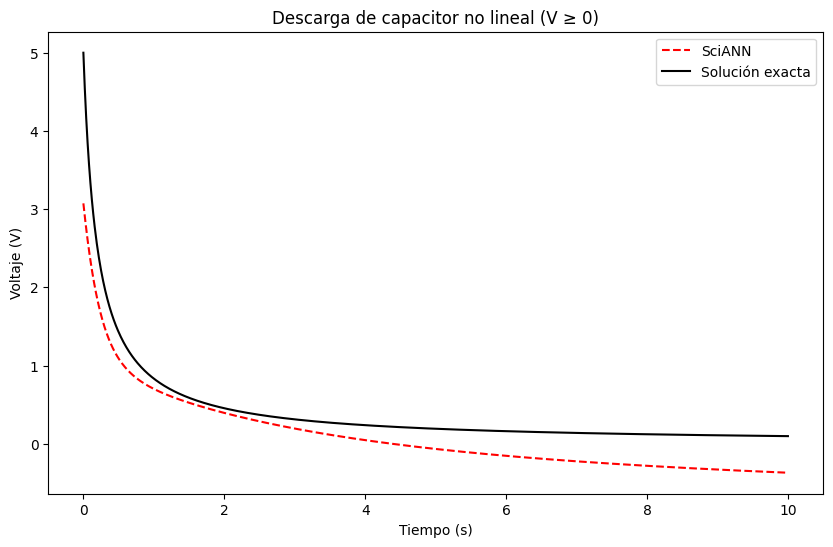

In [7]:
import sciann as sn
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del circuito
R = 1.0   # Ohm
C = 1.0   # Faradio
V0 = 5.0  # Voltaje inicial

# Variable independiente (tiempo)
t = sn.Variable('t', dtype='float32')

# Red neuronal con salida positiva (softplus)
V = sn.Functional('V', [t], 4*[20], activation='softplus')

# Ecuación diferencial: dV/dt + (1/(RC)) * V^2 = 0
dVdt = sn.diff(V, t)
ode = dVdt + (1/(R*C)) * V**2

# Condición inicial: V(0) = V0
IC = (1 - sn.sign(t - 0.01)) * (V - V0)

# Modelo SciANN
model = sn.SciModel(
    inputs=[t],
    targets=[ode, IC],
    loss_func="mse",
    optimizer="adam",
)

# Entrenamiento (t ∈ [0, 10])
t_train = np.linspace(0, 10, 200).reshape(-1, 1)
model.train(
    t_train,
    ['zeros', 'zeros'],
    epochs=200,
    batch_size=32,
    verbose=0
)

# Predicción
t_test = np.linspace(0, 10, 1000).reshape(-1, 1)
V_nn = V.eval(model, t_test)

# Solución analítica
V_exact = V0 / (1 + (V0/(R*C)) * t_test)

# Gráficos
plt.figure(figsize=(10, 6))
plt.plot(t_test, V_nn, 'r--', label='SciANN')
plt.plot(t_test, V_exact, 'k-', label='Solución exacta')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Descarga de capacitor no lineal (V ≥ 0)')
plt.legend()
plt.show()

# Ejemplo 1: Resolución de una EDO Lineal de Primer Orden (con DeepXDE)

Compiling model...
Building feed-forward neural network...
'build' took 0.092692 s

'compile' took 0.571582 s

Training model...

Step      Train loss              Test loss               Test metric
0         [1.78e-01, 1.21e+01]    [1.78e-01, 1.21e+01]    []  
500       [5.33e-03, 1.53e-03]    [5.33e-03, 1.53e-03]    []  

Best model at step 500:
  train loss: 6.85e-03
  test loss: 6.85e-03
  test metric: []

'train' took 2.250915 s



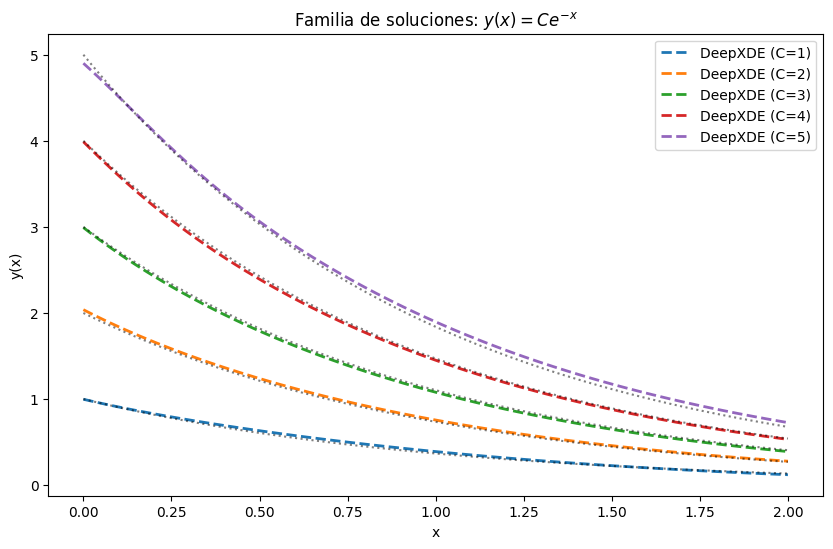

In [8]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

# Definir geometría 2D (x ∈ [0, 2], C ∈ [0.5, 5])
geom = dde.geometry.Rectangle([0, 0.5], [2, 5])

# Ecuación diferencial: dy/dx + y = 0
def pde(xy, y):
    dy_dx = dde.grad.jacobian(y, xy, j=0)  # Derivada respecto a x (j=0)
    return dy_dx + y

# Condición inicial y(0, C) = C (en el borde izquierdo x=0)
def boundary_left(x, on_boundary):
    return on_boundary and np.isclose(x[0], 0)

bc = dde.icbc.DirichletBC(
    geom,
    lambda x: x[:, 1:2],  # y = C (segunda componente de la entrada)
    boundary_left
)

# Configurar el problema PDE
data = dde.data.PDE(
    geom,
    pde,
    bc,
    num_domain=2000,  # Puntos en el dominio
    num_boundary=100,  # Puntos en el borde
)

# Construir la red neuronal (2 entradas [x, C], 1 salida y)
net = dde.nn.FNN(
    [2] + 4*[20] + [1],  # 4 capas ocultas de 20 neuronas
    activation="tanh",
    kernel_initializer="Glorot uniform"
)

model = dde.Model(data, net)
model.compile("adam", lr=1e-3)

# Entrenamiento (500 épocas ~ 10000 iteraciones con batch_size=20)
losshistory, train_state = model.train(iterations=500)

# Visualización para diferentes valores de C
x_test = np.linspace(0, 2, 100)[:, None]
C_test_values = [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 6))
for C in C_test_values:
    # Crear entrada (x, C)
    inputs = np.hstack([x_test, C * np.ones_like(x_test)])
    y_pred = model.predict(inputs)
    y_exact = C * np.exp(-x_test)
    
    plt.plot(x_test, y_pred, "--", linewidth=2, label=f"DeepXDE (C={C})")
    plt.plot(x_test, y_exact, "k:", alpha=0.5)

plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Familia de soluciones: $y(x) = C e^{-x}$")
plt.legend()
plt.show()

In [20]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

# Definir geometría 2D (x ∈ [0, 2], C ∈ [0.5, 5])
geom = dde.geometry.Rectangle([0, 0.5], [2, 5])

# Ecuación diferencial: dy/dx + y = 0
def pde(xy, y):
    dy_dx = dde.grad.jacobian(y, xy, j=0)  # Derivada respecto a x (j=0)
    return dy_dx + y

# Condición inicial y(0, C) = C (en el borde izquierdo x=0)
def boundary_left(x, on_boundary):
    return on_boundary and np.isclose(x[0], 0)

bc = dde.icbc.DirichletBC(
    geom,
    lambda x: x[:, 1:2],  # y = C (segunda componente de la entrada)
    boundary_left
)

# Configurar el problema PDE
data = dde.data.PDE(
    geom,
    pde,
    bc,
    num_domain=2000,  # Puntos en el dominio
    num_boundary=100,  # Puntos en el borde
)

# Construir la red neuronal (2 entradas [x, C], 1 salida y)
net = dde.nn.FNN(
    [2] + 4*[20] + [1],  # 4 capas ocultas de 20 neuronas
    activation="tanh",
    kernel_initializer="Glorot uniform"
)


import tensorflow as tf  # Asegúrate de importar TensorFlow

# Definir una función de pérdida personalizada
def custom_loss(y_true, y_pred):
    # Pérdida estándar (MSE)
    loss = tf.reduce_mean(tf.square(y_true - y_pred))
    
    # Puntos de la condición inicial
    x_bc = np.array([[0, C] for C in C_test_values])  # Puntos en x=0 para diferentes C
    y_bc_pred = model.predict(x_bc)
    y_bc_exact = x_bc[:, 1]  # y = C en x=0
    
    # Pérdida en la condición inicial
    loss_bc = tf.reduce_mean(tf.square(y_bc_exact - y_bc_pred))
    
    # Combinar pérdidas
    return loss + 0.1 * loss_bc  # Ajustar el peso según sea necesario

# Compilar el modelo con la función de pérdida personalizada
model.compile("adam", lr=1e-3, loss=custom_loss)

# Entrenamiento
losshistory, train_state = model.train(iterations=100)


# model = dde.Model(data, net)
# model.compile("adam", lr=1e-3)

# Entrenamiento (500 épocas ~ 10000 iteraciones con batch_size=20)
# losshistory, train_state = model.train(iterations=100)

# Visualización para diferentes valores de C
x_test = np.linspace(0, 2, 100)[:, None]
C_test_values = [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 6))
for C in C_test_values:
    # Crear entrada (x, C)
    inputs = np.hstack([x_test, C * np.ones_like(x_test)])
    y_pred = model.predict(inputs)
    y_exact = C * np.exp(-x_test)
    
    plt.plot(x_test, y_pred, "--", linewidth=2, label=f"DeepXDE (C={C})")
    plt.plot(x_test, y_exact, "k:", alpha=0.5)

plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Familia de soluciones: $y(x) = C e^{-x}$")
plt.legend()
plt.show()

Compiling model...


NameError: name 'C_test_values' is not defined

---
## Ejemplo 2: Comportamiento físico de un Circuito RC (con DeepXDE)

In [9]:
!pip show deepxde

Name: DeepXDE
Version: 1.14.0
Summary: A library for scientific machine learning
Home-page: https://github.com/lululxvi/deepxde
Author: 
Author-email: Lu Lu <lululxvi@gmail.com>
License: LGPL-2.1
Location: /opt/miniconda3/envs/sci/lib/python3.10/site-packages
Requires: matplotlib, numpy, scikit-learn, scikit-optimize, scipy
Required-by: 


Compiling model...
Building feed-forward neural network...
'build' took 0.103736 s

'compile' took 0.605589 s

Training model...

Step      Train loss              Test loss               Test metric
0         [5.26e-03, nan]         [5.26e-03, nan]         []  

Best model at step 0:
  train loss: inf
  test loss: inf
  test metric: 

'train' took 0.713141 s



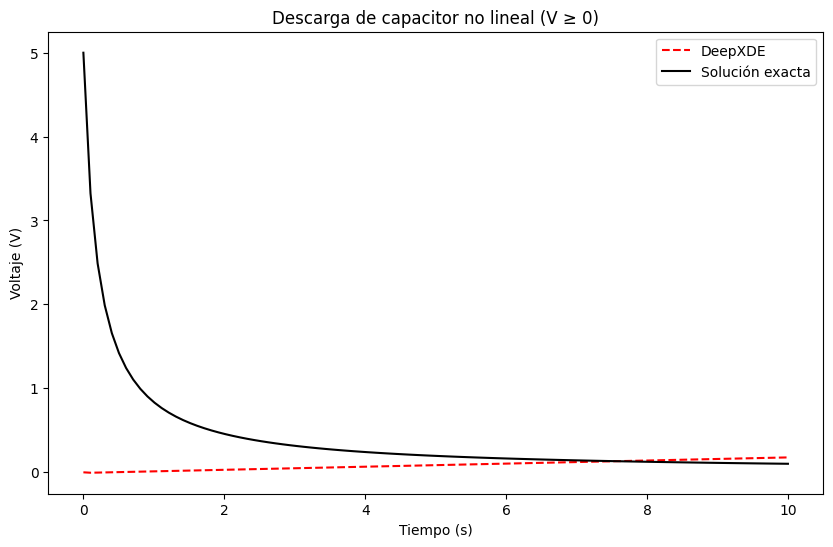

In [16]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del circuito
R = 1.0   # Ohm
C = 1.0   # Faradio
V0 = 5.0  # Voltaje inicial

# Definición de la variable independiente (tiempo)
def func(t):
    return t

# Ecuación diferencial: dV/dt + (1/(RC)) * V^2 = 0
def pde(t, V):
    dVdt = dde.grad.jacobian(V, t)
    return dVdt + (1/(R*C)) * V**2

# Condición inicial: V(0) = V0
def initial_condition(t):
    return V0

# Dominio de entrenamiento
geom = dde.geometry.TimeDomain(0, 10)

# Definición del problema
data = dde.data.PDE(
    geom,
    pde,
    [dde.icbc.IC(geom, initial_condition, lambda _, on_initial: on_initial)],
    num_domain=200,
    num_boundary=0,
)

# Definición del modelo
net = dde.nn.FNN([1] + 4 * [20] + [1], "relu", "Glorot uniform")
model = dde.Model(data, net)

# Entrenamiento
model.compile("adam", lr=0.001)
model.train(epochs=100)

# Predicción
t_test = np.linspace(0, 10, 1000).reshape(-1, 1)
V_nn = model.predict(t_test)

def residual_based_refinement(model, num_new_points=10):
    # Obtener los puntos de entrenamiento actuales
    current_points = model.data.train_x
    # Calcular el residuo en los puntos actuales
    residuals = model.predict(current_points)
    
    # Identificar los puntos con mayor residuo
    indices = np.argsort(residuals.flatten())[-num_new_points:]
    new_points = current_points[indices]
    
    # Añadir nuevos puntos al conjunto de entrenamiento
    model.data.train_x = np.vstack((model.data.train_x, new_points))


# Solución analítica
V_exact = V0 / (1 + (V0/(R*C)) * t_test)

# Gráficos
plt.figure(figsize=(10, 6))
plt.plot(t_test, V_nn, 'r--', label='DeepXDE')
plt.plot(t_test, V_exact, 'k-', label='Solución exacta')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Descarga de capacitor no lineal (V ≥ 0)')
plt.legend()
plt.show()


In [18]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del circuito
R = 1.0   # Ohm
C = 1.0   # Faradio
V0 = 5.0  # Voltaje inicial

# Ecuación diferencial: dV/dt + (1/(RC)) * V^2 = 0
def pde(t, V):
    dVdt = dde.grad.jacobian(V, t)
    return dVdt + (1/(R*C)) * V**2

# Condición inicial: V(0) = V0
def initial_condition(t):
    return V0

# Dominio de entrenamiento: tiempo de 0 a 10 segundos
geom = dde.geometry.TimeDomain(0, 10)

# Genera conjunto de datos PDE con puntos fijos iniciales
num_train_points = 200
data = dde.data.PDE(
    geom,
    pde,
    [dde.icbc.IC(geom, initial_condition, lambda _, on_initial: on_initial)],
    num_domain=num_train_points,
    num_boundary=0,
)

# Definición del modelo: 1 entrada, 4 capas ocultas de 20 neuronas cada una, 1 salida
net = dde.nn.FNN([1] + 4 * [20] + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)

# Callback para random resampling: cambia puntos de entrenamiento de dominio cada epoch
class RandomResamplingCallback(dde.callbacks.Callback):
    def __init__(self, data, geom, num_points):
        super().__init__()
        self.data = data
        self.geom = geom
        self.num_points = num_points

    def on_epoch_end(self, epoch, variables):
        # Genera nuevos puntos aleatorios uniformes en el dominio temporal
        new_x = self.geom.random_points(self.num_points)
        # Actualiza puntos de dominio en el dataset
        self.data.train_x = np.vstack([
            new_x,
            self.data.train_x[self.data.train_x[:, 0] == 0]  # mantiene la condición inicial intacta (t=0)
        ])

# Preparamos el callback
resampling_cb = RandomResamplingCallback(data, geom, num_train_points)

# Compilamos y entrenamos modelo con callback
model.compile("adam", lr=0.001)
losshistory, train_state = model.train(epochs=1000, callbacks=[resampling_cb])

# Predicción luego de entrenamiento
t_test = np.linspace(0, 10, 1000).reshape(-1, 1)
V_nn = model.predict(t_test)

# Solución analítica para comparar
V_exact = V0 / (1 + (V0/(R*C)) * t_test)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(t_test, V_nn, 'r--', label='DeepXDE con resampling aleatorio')
plt.plot(t_test, V_exact, 'k-', label='Solución exacta')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Descarga de capacitor no lineal (V ≥ 0)')
plt.legend()
plt.show()


Compiling model...
Building feed-forward neural network...
'build' took 0.093696 s

'compile' took 0.645837 s

Training model...

0         [2.11e-03, nan]         [2.11e-03, nan]         []  


TypeError: RandomResamplingCallback.on_epoch_end() missing 2 required positional arguments: 'epoch' and 'variables'

Compiling model...
Building feed-forward neural network...
'build' took 0.100086 s

'compile' took 0.643171 s



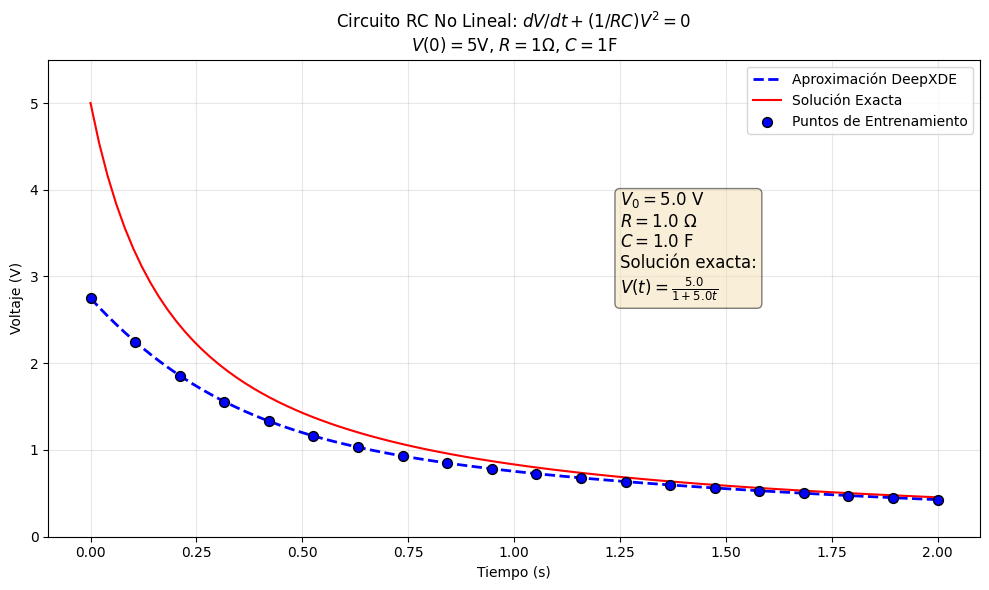

In [13]:
import deepxde as dde
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Parámetros físicos fijos
R = 1.0  # Resistencia (ohm)
C = 1.0  # Capacitancia (farad)
V0 = 5.0  # Voltaje inicial (V)
IC_weight = 1.0  # Peso para la condición inicial

# Definir la ecuación diferencial no lineal
def pde(x, y):
    dy_dt = dde.grad.jacobian(y, x, i=0, j=0)  # dV/dt
    residual_ode = dy_dt + (1/(R*C)) * (y ** 2)  # Término no lineal V^2
    # Condición inicial con penalización gaussiana en t=0
    residual_ic = IC_weight * tf.exp(-100 * x[:, 0:1]**2) * (y - V0)
    return residual_ode + residual_ic

# Dominio temporal: t ∈ [0, 2] segundos
geom = dde.geometry.TimeDomain(0, 2)

# Generar puntos de entrenamiento (20 puntos en el intervalo temporal)
training_points = geom.uniform_points(20, boundary=True)

# Configurar datos PDE
data = dde.data.PDE(
    geom,
    pde,
    [],
    num_domain=0,
    num_boundary=0,
    anchors=training_points,
)

# Crear red neuronal (1 entrada: tiempo, 1 salida: voltaje)
net = dde.maps.FNN(
    [1] + 4*[20] + [1],  # 1 entrada (t), 4 capas ocultas de 20 neuronas, 1 salida (V)
    "swish",  # Función de activación
    "Glorot normal"  # Inicialización
)

# Configurar modelo
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# Entrenamiento (400 épocas)
losshistory, train_state = model.train(
    epochs=400,
    batch_size=training_points.shape[0],
    display_every=100,
    verbose=0
)

# Preparar datos para graficar
t_test = np.linspace(0, 2, 100)[:, None]  # Puntos de prueba

# Predicción de la red neuronal
V_pred = model.predict(t_test)

# Solución exacta: V(t) = V0 / (1 + (V0/(R*C)) * t)
V_exact = V0 / (1 + (V0/(R*C)) * t_test)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(t_test, V_pred, 'b--', linewidth=2, label='Aproximación DeepXDE')
plt.plot(t_test, V_exact, 'r-', linewidth=1.5, label='Solución Exacta')
plt.scatter(training_points, model.predict(training_points), 
            c='blue', s=50, edgecolors='k', zorder=3, label='Puntos de Entrenamiento')

# Configuración del gráfico
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Circuito RC No Lineal: $dV/dt + (1/RC)V^2 = 0$\n$V(0) = 5$V, $R=1\Omega$, $C=1$F')
plt.legend()
plt.grid(alpha=0.3)
plt.ylim(0, V0+0.5)
plt.tight_layout()

# Añadir caja de texto con parámetros
textstr = '\n'.join((
    r'$V_0 = %.1f$ V' % V0,
    r'$R = %.1f$ $\Omega$' % R,
    r'$C = %.1f$ F' % C,
    r'Solución exacta:',
    r'$V(t) = \frac{%.1f}{1 + %.1f t}$' % (V0, V0/(R*C))))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(1.25, 4.0, textstr, fontsize=12, verticalalignment='top', bbox=props)

plt.show()

Compiling model...
Building feed-forward neural network...
'build' took 0.077154 s

'compile' took 0.894246 s



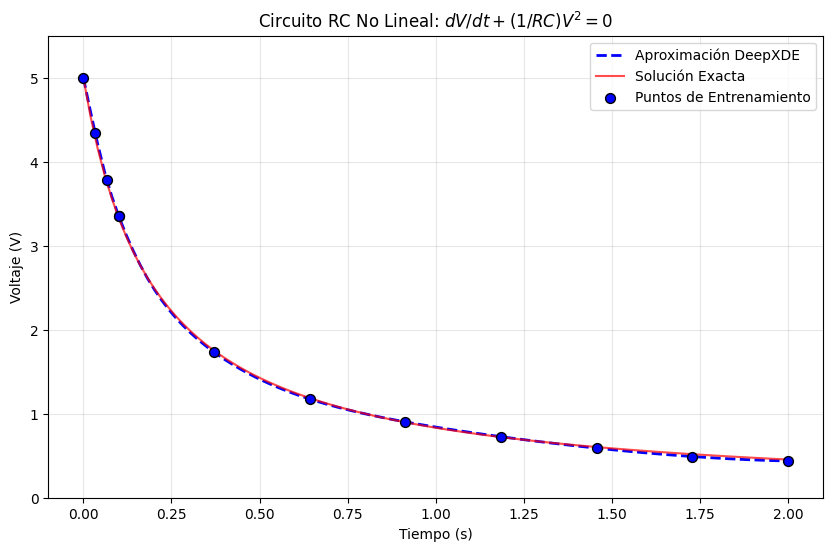

In [36]:
import deepxde as dde
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Parámetros físicos
R = 1.0  # Resistencia (Ω)
C = 1.0  # Capacitancia (F)
V0 = 5.0  # Voltaje inicial (V)

# Definir la ecuación diferencial (sin término de condición inicial)
def pde(x, y):
    dy_dt = dde.grad.jacobian(y, x, i=0, j=0)
    return dy_dt + (1/(R*C)) * (y ** 2)

# Transformación de salida para forzar V(0) = V0 exactamente
def output_transform(x, y):
    return V0 + x * y  # Garantiza que en x=0 (t=0), y = V0

# Dominio temporal: t ∈ [0, 2] segundos
geom = dde.geometry.TimeDomain(0, 2)

# Generar puntos de entrenamiento (más densos cerca de t=0)
# training_points = np.sort(np.concatenate([
#     np.linspace(0, 0.1, 10),  # Alta densidad cerca de t=0
#     np.linspace(0.1, 2, 15)    # Menor densidad en el resto
# ]))[:, None]

training_points = np.sort(np.concatenate([
    np.linspace(0, 0.1, 4),  # Alta densidad cerca de t=0
    np.linspace(0.1, 2, 8)    # Menor densidad en el resto
]))[:, None]

# Configurar datos PDE
data = dde.data.PDE(
    geom,
    pde,
    [],  # Sin condiciones adicionales (la transformación maneja IC)
    num_domain=0,
    num_boundary=0,
    anchors=training_points,
)

# Crear red neuronal (1 entrada: tiempo, 1 salida: voltaje)
net = dde.maps.FNN(
    [1] + [20] * 4 + [1],  # 1 entrada, 4 capas ocultas de 20 neuronas, 1 salida
    "tanh",  # Tangente hiperbólica funciona mejor para condiciones iniciales
    "Glorot normal"
)

# Aplicar transformación de salida
net.apply_output_transform(output_transform)

# Configurar modelo
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# Entrenamiento (más épocas para mejor convergencia)
losshistory, train_state = model.train(
    epochs=2000,
    batch_size=training_points.shape[0],
    display_every=500,
    verbose=0
)

# Preparar datos para graficar
t_test = np.linspace(0, 2, 100)[:, None]

# Predicción y solución exacta
V_pred = model.predict(t_test)
V_exact = V0 / (1 + (V0/(R*C)) * t_test)

# Graficar resultados
plt.figure(figsize=(10, 6))

# Curvas principales
plt.plot(t_test, V_pred, 'b--', linewidth=2, label='Aproximación DeepXDE')
plt.plot(t_test, V_exact, 'r-', linewidth=1.5, alpha=0.7, label='Solución Exacta')

# Puntos de entrenamiento
V_train = model.predict(training_points)
plt.scatter(training_points, V_train, c='blue', s=50, 
            edgecolors='k', zorder=3, label='Puntos de Entrenamiento')

# Destacar condición inicial
# plt.scatter([0], [V0], c='green', s=150, marker='*', 
            # edgecolors='k', zorder=4, label='Condición Inicial (V0=5V)')

# Configuración del gráfico
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Circuito RC No Lineal: $dV/dt + (1/RC)V^2 = 0$')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.ylim(0, V0+0.5)

# Añadir información de parámetros
# textstr = '\n'.join((
#     r'$V_0 = %.1f$ V' % V0,
#     r'$R = %.1f$ $\Omega$' % R,
#     r'$C = %.1f$ F' % C,
#     r'Solución exacta:',
#     r'$V(t) = \frac{%.1f}{1 + %.1f t}$' % (V0, V0/(R*C))))
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# plt.text(1.25, 4.0, textstr, fontsize=12, verticalalignment='top', bbox=props)

# Insertar zoom cerca de t=0
# ax_inset = plt.axes([0.25, 0.5, 0.3, 0.3])
# ax_inset.plot(t_test, V_pred, 'b--')
# ax_inset.plot(t_test, V_exact, 'r-')
# ax_inset.scatter(training_points, V_train, c='blue', s=30, edgecolors='k')
# ax_inset.scatter([0], [V0], c='green', s=80, marker='*', edgecolors='k')
# ax_inset.set_xlim(-0.02, 0.1)
# ax_inset.set_ylim(4.95, 5.05)
# ax_inset.grid(alpha=0.2)
# ax_inset.set_title('Zoom cerca de t=0')

# plt.tight_layout()
plt.show()

Compiling model...
Building feed-forward neural network...
'build' took 0.071172 s

'compile' took 0.667734 s

Training model...

Step      Train loss    Test loss     Test metric
0         [5.96e+02]    [5.96e+02]    []  
500       [4.33e+00]    [4.33e+00]    []  
1000      [6.68e-01]    [6.68e-01]    []  
1500      [1.79e-01]    [1.79e-01]    []  
2000      [5.57e-02]    [5.57e-02]    []  
2500      [1.93e-02]    [1.93e-02]    []  
3000      [6.71e-03]    [6.71e-03]    []  

Best model at step 3000:
  train loss: 6.71e-03
  test loss: 6.71e-03
  test metric: []

'train' took 4.124964 s



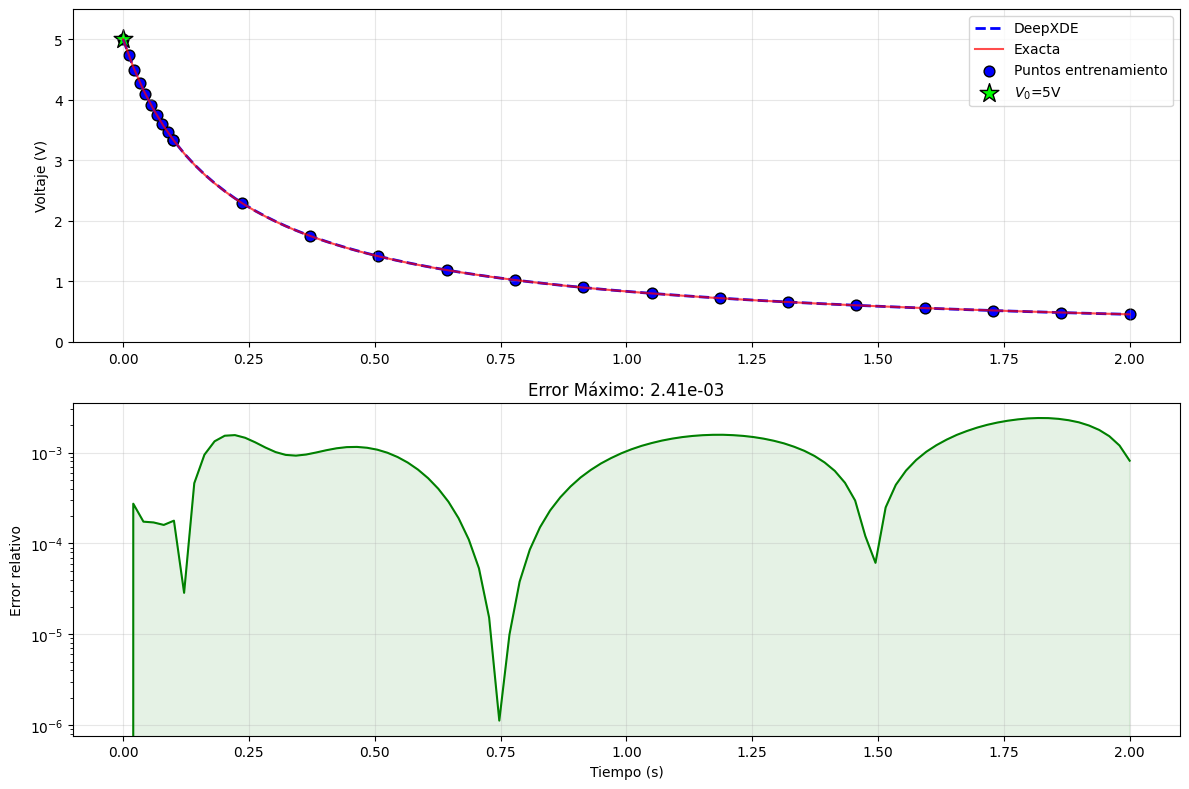

In [23]:
import deepxde as dde
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Parámetros físicos (constantes)
R = 1.0   # Ω
C = 1.0   # F
V0 = 5.0  # V

# Definición de la EDO
def pde(x, y):
    dy_dt = dde.grad.jacobian(y, x, i=0, j=0)
    return dy_dt + (1/(R*C)) * (y ** 2)

# Transformación de salida: Garantiza V(0)=V0 exactamente
def output_transform(x, y):
    return V0 + x * y  # En t=0 → V0 + 0*y = V0

# Dominio temporal
geom = dde.geometry.TimeDomain(0, 2)

# Puntos de entrenamiento (25 puntos estratégicos)
training_points = np.sort(np.concatenate([
    np.linspace(0, 0.1, 10),  # Alta densidad inicial
    np.linspace(0.1, 2, 15)   # Menor densidad después
]))[:, None]

# Configuración de datos PDE
data = dde.data.PDE(
    geom,
    pde,
    [],
    num_domain=0,
    num_boundary=0,
    anchors=training_points,
)

# Arquitectura de red (1-50-50-50-50-1)
net = dde.maps.FNN([1] + [50] * 4 + [1], "tanh", "Glorot normal")
net.apply_output_transform(output_transform)

# Compilación y entrenamiento
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# Entrenamiento con 3000 épocas
losshistory, train_state = model.train(
    epochs=3000,               # Más épocas para mejor convergencia
    batch_size=len(training_points),
    display_every=500,         # Mostrar progreso cada 500 épocas
    callbacks=[dde.callbacks.EarlyStopping(min_delta=1e-6, patience=500)]
)

# Validación y gráficos
t_test = np.linspace(0, 2, 100)[:, None]
V_pred = model.predict(t_test)
V_exact = V0 / (1 + (V0/(R*C)) * t_test)

# Cálculo de error relativo
error = np.abs(V_pred - V_exact) / V_exact
max_error = np.max(error)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t_test, V_pred, 'b--', lw=2, label='DeepXDE')
plt.plot(t_test, V_exact, 'r-', lw=1.5, alpha=0.7, label='Exacta')
plt.scatter(training_points, model.predict(training_points), 
            c='blue', s=60, ec='k', label='Puntos entrenamiento')
plt.scatter([0], [V0], c='lime', s=200, marker='*', ec='k', label='$V_0$=5V')
plt.ylabel('Voltaje (V)')
plt.ylim(0, 5.5)
plt.grid(alpha=0.3)
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogy(t_test, error, 'g-', lw=1.5)
plt.fill_between(t_test[:,0], 0, error[:,0], color='green', alpha=0.1)
plt.grid(alpha=0.3)
plt.xlabel('Tiempo (s)')
plt.ylabel('Error relativo')
plt.title(f'Error Máximo: {max_error:.2e}')

plt.tight_layout()
plt.show()

Compiling model...
Building feed-forward neural network...
'build' took 0.067998 s

'compile' took 0.761352 s



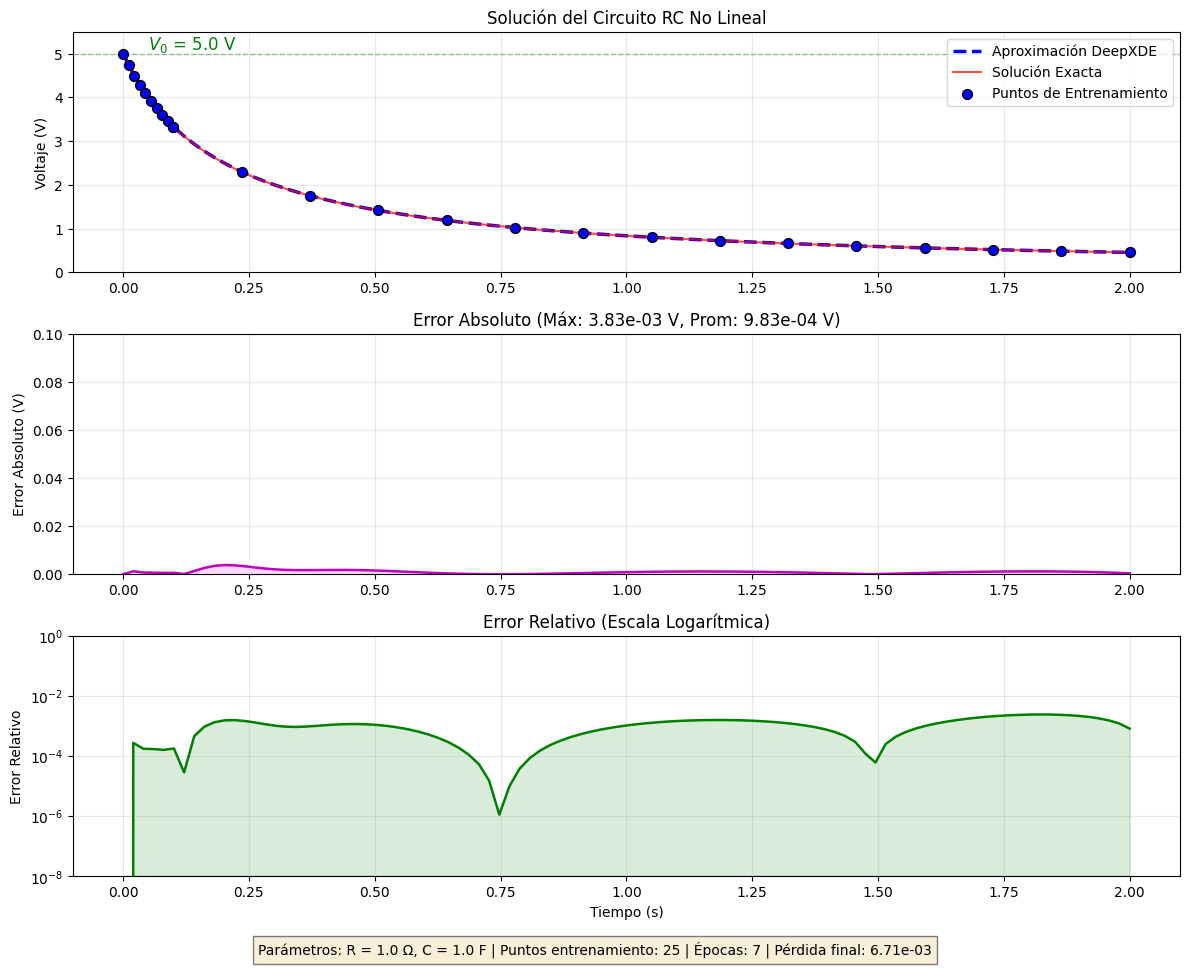

In [28]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos
R = 1.0   # Ω
C = 1.0   # F
V0 = 5.0  # V

# Definición de la EDO
def pde(x, y):
    dy_dt = dde.grad.jacobian(y, x, i=0, j=0)
    return dy_dt + (1/(R*C)) * (y ** 2)

# Transformación de salida: Garantiza V(0)=V0 exactamente
def output_transform(x, y):
    return V0 + x * y  # En t=0 → V0 + 0*y = V0

# Dominio temporal
geom = dde.geometry.TimeDomain(0, 2)

# Puntos de entrenamiento estratégicos (25 puntos)
training_points = np.sort(np.concatenate([
    np.linspace(0, 0.1, 10),  # Alta densidad inicial (10 puntos)
    np.linspace(0.1, 2, 15)    # Menor densidad después (15 puntos)
]))[:, None]

# Configuración de datos PDE
data = dde.data.PDE(
    geom,
    pde,
    [],  # Sin condiciones adicionales (transformación maneja IC)
    num_domain=0,
    num_boundary=0,
    anchors=training_points,
)

# Arquitectura de red (1-50-50-50-50-1)
net = dde.maps.FNN([1] + [50] * 4 + [1], "tanh", "Glorot normal")
net.apply_output_transform(output_transform)

# Compilación y entrenamiento
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# Entrenamiento con 3000 épocas
losshistory, train_state = model.train(
    epochs=3000,
    batch_size=len(training_points),
    display_every=500,
    callbacks=[dde.callbacks.EarlyStopping(min_delta=1e-6, patience=500)],
    verbose=0
)

# Validación y gráficos
t_test = np.linspace(0, 2, 100)[:, None]
V_pred = model.predict(t_test)
V_exact = V0 / (1 + (V0/(R*C)) * t_test)

# Cálculo de errores
error_abs = np.abs(V_pred - V_exact)
error_rel = error_abs / V_exact
max_error = np.max(error_abs)
mean_error = np.mean(error_abs)

# Crear figura con 2 subgráficos
plt.figure(figsize=(12, 10))

# Subgráfico 1: Solución y puntos de entrenamiento
plt.subplot(3, 1, 1)
plt.plot(t_test, V_pred, 'b--', linewidth=2.5, label='Aproximación DeepXDE')
plt.plot(t_test, V_exact, 'r-', linewidth=1.5, alpha=0.7, label='Solución Exacta')
plt.scatter(training_points, model.predict(training_points), 
            c='blue', s=50, edgecolors='k', zorder=3, label='Puntos de Entrenamiento')

# Línea horizontal en V0 para destacar condición inicial
plt.axhline(y=V0, color='g', linestyle='--', alpha=0.4, linewidth=1)
plt.text(0.05, V0+0.1, f'$V_0$ = {V0} V', fontsize=12, color='g')

plt.ylabel('Voltaje (V)')
plt.ylim(0, 5.5)
plt.grid(alpha=0.3)
plt.legend(loc='upper right')
plt.title('Solución del Circuito RC No Lineal')

# Subgráfico 2: Error absoluto
plt.subplot(3, 1, 2)
plt.plot(t_test, error_abs, 'm-', linewidth=1.8)
plt.fill_between(t_test[:,0], 0, error_abs[:,0], color='magenta', alpha=0.15)
plt.grid(alpha=0.3)
plt.ylabel('Error Absoluto (V)')
plt.ylim(0, 0.1 if max_error < 0.1 else max_error*1.1)
plt.title(f'Error Absoluto (Máx: {max_error:.2e} V, Prom: {mean_error:.2e} V)')

# Subgráfico 3: Error relativo
plt.subplot(3, 1, 3)
plt.semilogy(t_test, error_rel, 'g-', linewidth=1.8)
plt.fill_between(t_test[:,0], 1e-8, error_rel[:,0], color='green', alpha=0.15)
plt.grid(alpha=0.3, which='both')
plt.xlabel('Tiempo (s)')
plt.ylabel('Error Relativo')
plt.ylim(1e-8, 1)
plt.title('Error Relativo (Escala Logarítmica)')

# Añadir información de parámetros
plt.figtext(0.5, 0.01, 
            f'Parámetros: R = {R} Ω, C = {C} F | ' 
            f'Puntos entrenamiento: {len(training_points)} | '
            f'Épocas: {len(losshistory.loss_train)} | '
            f'Pérdida final: {losshistory.loss_train[-1][0]:.2e}',
            ha='center', fontsize=10, bbox=dict(facecolor='wheat', alpha=0.5))

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

Compiling model...
Building feed-forward neural network...
'build' took 0.087739 s

'compile' took 0.473852 s

INFO:tensorflow:model/model.ckpt-50.ckpt is not in all_model_checkpoint_paths. Manually adding it.
INFO:tensorflow:model/model.ckpt-100.ckpt is not in all_model_checkpoint_paths. Manually adding it.
INFO:tensorflow:model/model.ckpt-150.ckpt is not in all_model_checkpoint_paths. Manually adding it.
INFO:tensorflow:model/model.ckpt-200.ckpt is not in all_model_checkpoint_paths. Manually adding it.
INFO:tensorflow:model/model.ckpt-250.ckpt is not in all_model_checkpoint_paths. Manually adding it.
INFO:tensorflow:model/model.ckpt-300.ckpt is not in all_model_checkpoint_paths. Manually adding it.
INFO:tensorflow:model/model.ckpt-350.ckpt is not in all_model_checkpoint_paths. Manually adding it.
INFO:tensorflow:model/model.ckpt-400.ckpt is not in all_model_checkpoint_paths. Manually adding it.
INFO:tensorflow:model/model.ckpt-450.ckpt is not in all_model_checkpoint_paths. Manually a

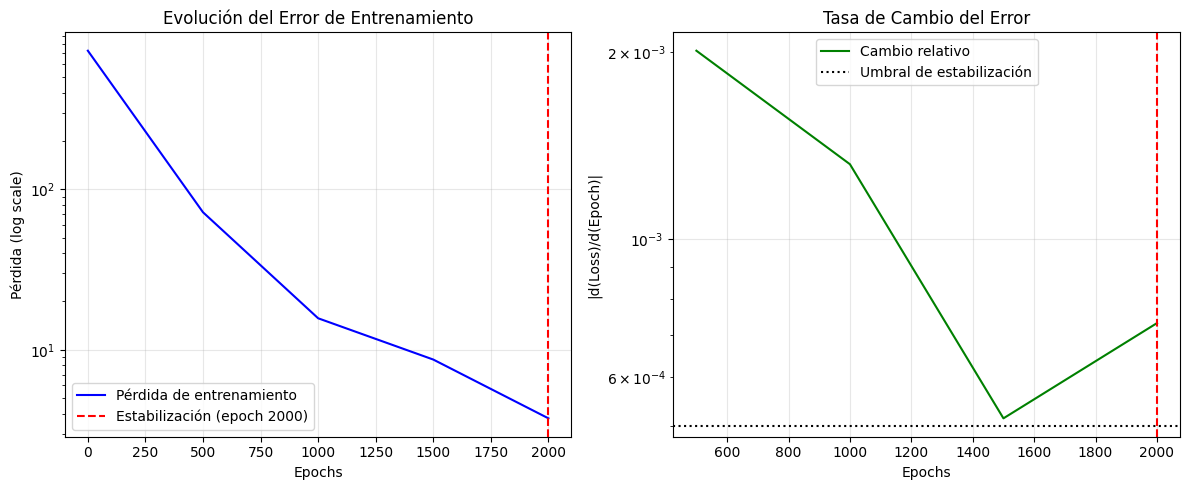

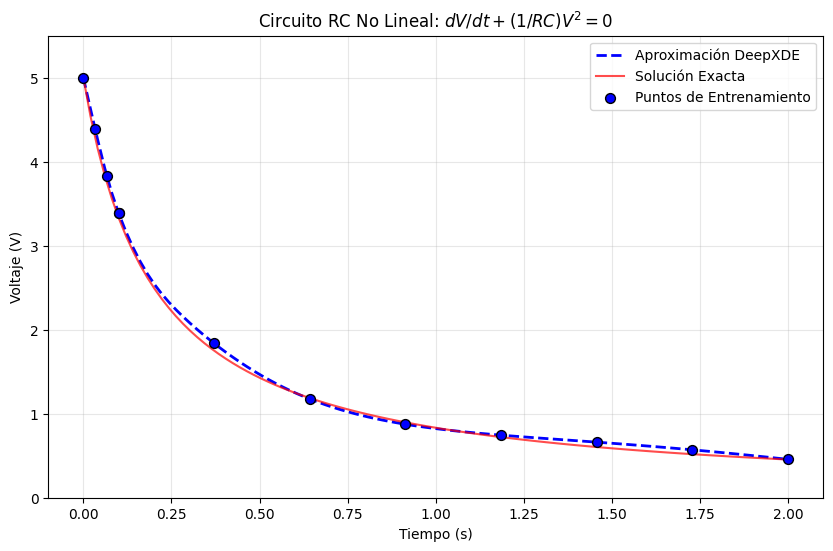

El error se estabiliza a partir del epoch 2000


In [2]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos
R = 1.0  # Resistencia (Ω)
C = 1.0  # Capacitancia (F)
V0 = 5.0  # Voltaje inicial (V)

# Definir la ecuación diferencial
def pde(x, y):
    dy_dt = dde.grad.jacobian(y, x, i=0, j=0)
    return dy_dt + (1/(R*C)) * (y ** 2)

# Transformación de salida para forzar V(0) = V0 exactamente
def output_transform(x, y):
    return V0 + x * y

# Dominio temporal: t ∈ [0, 2] segundos
geom = dde.geometry.TimeDomain(0, 2)

# Generar puntos de entrenamiento
training_points = np.sort(np.concatenate([
    np.linspace(0, 0.1, 4),  # Alta densidad cerca de t=0
    np.linspace(0.1, 2, 8)    # Menor densidad en el resto
]))[:, None]

# Configurar datos PDE
data = dde.data.PDE(
    geom,
    pde,
    [],
    num_domain=0,
    num_boundary=0,
    anchors=training_points,
)

# Crear red neuronal
net = dde.maps.FNN(
    [1] + [20] * 4 + [1],
    "tanh",
    "Glorot normal"
)

# Aplicar transformación de salida
net.apply_output_transform(output_transform)

# Configurar modelo
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# === MODIFICACIÓN PRINCIPAL: Entrenamiento con callback para guardar historia ===
# Configurar callback para guardar pérdida cada 50 epochs
checkpointer = dde.callbacks.ModelCheckpoint(
    "model/model.ckpt", 
    save_better_only=False, 
    period=50
)

# Entrenamiento guardando toda la historia
losshistory, train_state = model.train(
    epochs=2000,
    batch_size=training_points.shape[0],
    display_every=500,
    callbacks=[checkpointer],
    verbose=0
)

# === ANÁLISIS DE ESTABILIZACIÓN ===
# Obtener historial de pérdidas
loss_history = np.array([loss[0] for loss in losshistory.loss_train])
epochs_history = losshistory.steps

# Calcular derivada logarítmica para detectar estabilización
log_loss = np.log10(loss_history)
dlog_loss = np.abs(np.diff(log_loss) / np.diff(epochs_history))

# Encontrar punto de estabilización (cuando la derivada cae bajo umbral)
stable_threshold = 5e-4  # Umbral de cambio relativo
for i in range(50, len(dlog_loss)):
    if np.mean(dlog_loss[i-10:i]) < stable_threshold:
        stabilization_epoch = epochs_history[i]
        break
else:
    stabilization_epoch = epochs_history[-1]

# === GRÁFICO DE ERROR DE ENTRENAMIENTO ===
plt.figure(figsize=(12, 5))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.semilogy(epochs_history, loss_history, 'b-', label='Pérdida de entrenamiento')
plt.axvline(stabilization_epoch, color='r', linestyle='--', 
            label=f'Estabilización (epoch {stabilization_epoch})')
plt.xlabel('Epochs')
plt.ylabel('Pérdida (log scale)')
plt.title('Evolución del Error de Entrenamiento')
plt.grid(True, alpha=0.3)
plt.legend()

# Gráfico de derivada de la pérdida
plt.subplot(1, 2, 2)
plt.semilogy(epochs_history[1:], dlog_loss, 'g-', label='Cambio relativo')
plt.axhline(stable_threshold, color='k', linestyle=':', label='Umbral de estabilización')
plt.axvline(stabilization_epoch, color='r', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('|d(Loss)/d(Epoch)|')
plt.title('Tasa de Cambio del Error')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# === GRÁFICO DE SOLUCIONES (original) ===
t_test = np.linspace(0, 2, 100)[:, None]
V_pred = model.predict(t_test)
V_exact = V0 / (1 + (V0/(R*C)) * t_test)

plt.figure(figsize=(10, 6))
plt.plot(t_test, V_pred, 'b--', linewidth=2, label='Aproximación DeepXDE')
plt.plot(t_test, V_exact, 'r-', linewidth=1.5, alpha=0.7, label='Solución Exacta')
plt.scatter(training_points, model.predict(training_points), c='blue', s=50, 
            edgecolors='k', zorder=3, label='Puntos de Entrenamiento')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Circuito RC No Lineal: $dV/dt + (1/RC)V^2 = 0$')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.ylim(0, V0+0.5)
plt.show()

print(f"El error se estabiliza a partir del epoch {stabilization_epoch}")

In [7]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos
R = 1.0  # Resistencia (Ω)
C = 1.0  # Capacitancia (F)
V0 = 5.0  # Voltaje inicial (V)

# Definir la ecuación diferencial
def pde(x, y):
    dy_dt = dde.grad.jacobian(y, x, i=0, j=0)
    return dy_dt + (1/(R*C)) * (y ** 2)

# Transformación de salida para forzar V(0) = V0 exactamente
def output_transform(x, y):
    return V0 + x * y

# Dominio temporal: t ∈ [0, 2] segundos
geom = dde.geometry.TimeDomain(0, 2)

# Generar puntos de entrenamiento
training_points = np.sort(np.concatenate([
    np.linspace(0, 0.1, 4),  # Alta densidad cerca de t=0
    np.linspace(0.1, 2, 8)    # Menor densidad en el resto
]))[:, None]

# Configurar datos PDE
data = dde.data.PDE(
    geom,
    pde,
    [],
    num_domain=0,
    num_boundary=0,
    anchors=training_points,
)

# Crear red neuronal
net = dde.maps.FNN(
    [1] + [20] * 4 + [1],
    "tanh",
    "Glorot normal"
)

# Aplicar transformación de salida
net.apply_output_transform(output_transform)

# Configurar modelo
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# CORRECCIÓN: Usar dde.utils.LossHistory en lugar de dde.callbacks.LossHistory
loss_history_callback = dde.utils.LossHistory()

# Entrenamiento con registro detallado
losshistory, train_state = model.train(
    epochs=2000,
    batch_size=training_points.shape[0],
    display_every=500,
    callbacks=[loss_history_callback],
    verbose=0
)

# Obtener datos de la historia de entrenamiento
steps = loss_history_callback.steps
loss_values = np.array([loss[0] for loss in loss_history_callback.loss_train])

# Identificar punto de estabilización
window_size = 50  # Tamaño de ventana para análisis
min_epoch = 100   # Mínimo de épocas antes de considerar estabilización
stabilization_epoch = None
stabilization_loss = None

# Buscar estabilización
for i in range(min_epoch, len(loss_values) - window_size):
    # Calcular mejora relativa en la ventana
    initial_loss = loss_values[i]
    final_loss = loss_values[i + window_size]
    improvement = (initial_loss - final_loss) / initial_loss
    
    # Criterio: menos del 1% de mejora en window_size épocas
    if improvement < 0.01:
        stabilisation_epoch = steps[i]
        stabilisation_loss = loss_values[i]
        break

# Crear figura para la evolución del error
plt.figure(figsize=(14, 10))

# Gráfico principal: Evolución completa del error
plt.subplot(2, 1, 1)
plt.semilogy(steps, loss_values, 'b-', linewidth=1.5, label='Pérdida de entrenamiento')
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Error (log scale)', fontsize=12)
plt.title('Evolución del Error durante el Entrenamiento', fontsize=14)
plt.grid(True, alpha=0.3)

# Marcar punto de estabilización si se encontró
if stabilisation_epoch:
    plt.axvline(stabilisation_epoch, color='r', linestyle='--', 
                label=f'Estabilización (época {stabilisation_epoch})')
    plt.plot(stabilisation_epoch, stabilisation_loss, 'ro', markersize=8)
    
plt.legend(fontsize=10)
plt.xlim(0, steps[-1])

# Gráfico de detalle: Comportamiento final del error
plt.subplot(2, 1, 2)
zoom_start = max(0, len(loss_values) - 200)  # Últimas 200 épocas
if stabilisation_epoch:
    # Ajustar para mostrar desde estabilización o las últimas 200 épocas
    zoom_start = max(0, steps.index(stabilisation_epoch) - 50)
    
plt.semilogy(steps[zoom_start:], loss_values[zoom_start:], 'b-', linewidth=2)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Error (log scale)', fontsize=12)
plt.title('Comportamiento Final del Error', fontsize=14)
plt.grid(True, alpha=0.3)

# Marcar estabilización en el zoom
if stabilisation_epoch:
    plt.axvline(stabilisation_epoch, color='r', linestyle='--', 
                label=f'Época {stabilisation_epoch}')
    plt.plot(stabilisation_epoch, stabilisation_loss, 'ro', markersize=8)
    plt.legend()

plt.tight_layout()
plt.show()

# Gráfico de la solución física
t_test = np.linspace(0, 2, 100)[:, None]
V_pred = model.predict(t_test)
V_exact = V0 / (1 + (V0/(R*C)) * t_test)

plt.figure(figsize=(10, 6))
plt.plot(t_test, V_pred, 'b--', linewidth=2, label='Aproximación DeepXDE')
plt.plot(t_test, V_exact, 'r-', linewidth=1.5, alpha=0.7, label='Solución Exacta')
plt.scatter(training_points, model.predict(training_points), c='blue', s=50, 
            edgecolors='k', zorder=3, label='Puntos de Entrenamiento')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Circuito RC No Lineal: $dV/dt + (1/RC)V^2 = 0$')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.ylim(0, V0+0.5)
plt.show()

# Reporte textual de la estabilización
if stabilisation_epoch:
    print(f"\nRESULTADOS DE ESTABILIZACIÓN:")
    print(f"Época de estabilización: {stabilisation_epoch}")
    print(f"Valor del error en estabilización: {stabilisation_loss:.4e}")
    print(f"Valor final del error: {loss_values[-1]:.4e}")
    print(f"Reducción total del error: {((loss_values[0]-loss_values[-1])/loss_values[0])*100:.2f}%")
else:
    print("\nNo se detectó una clara estabilización del error durante el entrenamiento")
    print(f"Valor final del error: {loss_values[-1]:.4e}")
    print(f"Última mejora significativa: {((loss_values[-200]-loss_values[-1])/loss_values[-200])*100 if len(loss_values)>200 else 0:.2f}% en las últimas 200 épocas")

Compiling model...
Building feed-forward neural network...
'build' took 0.089621 s

'compile' took 0.648004 s



AttributeError: module 'deepxde.utils.tensorflow_compat_v1' has no attribute 'LossHistory'

---
# Ejemplo X: Ecuación Diferencial stiff con Circuito RLC


In [8]:
# import sciann as sn
# import numpy as np
# import matplotlib.pyplot as plt

# # Definir variable temporal
# t = sn.Variable('t', dtype='float32')

# # Definir redes neuronales para voltaje y corriente
# V = sn.Functional('V', [t], 4*[32], 'tanh')
# I = sn.Functional('I', [t], 4*[32], 'tanh')

# # Calcular derivadas temporales
# dVdt = sn.diff(V, t)
# dIdt = sn.diff(I, t)

# # Parámetros del circuito eléctrico (sistema stiff)
# R = 1e-3  # Resistencia muy baja
# C = 1e-6  # Capacitancia pequeña
# L = 1.0   # Inductancia
# alpha = 1/(R*C)  # 1e9 (término stiff)
# beta = 1/C        # 1e6
# gamma = 1/L       # 1

# # Sistema de ecuaciones diferenciales (circuito RLC no lineal)
# ode1 = dVdt + alpha*V - beta*I  # Ecuación del capacitor
# ode2 = dIdt + gamma*V           # Ecuación del inductor

# # Condiciones iniciales
# t_ic = np.array([0.0]).astype('float32')
# V_ic = np.array([1.0]).astype('float32')  # Voltaje inicial
# I_ic = np.array([0.0]).astype('float32')  # Corriente inicial

# # Puntos de entrenamiento
# t_ode = np.linspace(0, 1e-8, 1000).astype('float32').reshape(-1,1)
# t_train = np.vstack([t_ode, t_ic])

# # Configurar modelo SciANN
# model = sn.SciModel(
#     inputs=[t],
#     targets=[
#         sn.Data(V),  # Condición inicial V(0)=1
#         sn.Data(I),  # Condición inicial I(0)=0
#         ode1,        # Ecuación diferencial 1
#         ode2         # Ecuación diferencial 2
#     ],
#     loss_funcs=['mse', 'mse', 'mse', 'mse'],
#     loss_weights=[1e6, 1e6, 1, 1]  # Priorizar condiciones iniciales
# )

# # Entrenamiento con tasa de aprendizaje adaptativa
# model.train(
#     x_true=[t_ic, t_ic, t_ode, t_ode],
#     y_true=[V_ic, I_ic, np.zeros_like(t_ode), np.zeros_like(t_ode)],
#     epochs=10000,
#     batch_size=256,
#     learning_rate=0.001,
#     verbose=0,
#     callbacks=[sn.callbacks.ReduceLROnPlateau(patience=500)]
# )

# # Visualización de resultados
# t_test = np.linspace(0, 1e-8, 1000).astype('float32').reshape(-1,1)
# V_pred = V.eval(model, t_test)
# I_pred = I.eval(model, t_test)

# plt.figure(figsize=(12,6))
# plt.subplot(1,2,1)
# plt.plot(t_test*1e9, V_pred, 'b', label='Voltaje (V)')
# plt.xlabel('Tiempo (ns)')
# plt.ylabel('Voltaje')
# plt.legend()

# plt.subplot(1,2,2)
# plt.plot(t_test*1e9, I_pred, 'r', label='Corriente (A)')
# plt.xlabel('Tiempo (ns)')
# plt.ylabel('Corriente')
# plt.legend()
# plt.tight_layout()
# plt.show()

TypeError: ('Keyword argument not understood:', 'loss_funcs')

---
# Ejemplo Y: Calcular el Error Cuadrático

Intento inicial de calcular el error cuadrático entre la solución calculada con SciANN y la solución analítica exacta de una EDO Lineal de primer orden.


Total samples: 5000 
Batch size: 256 
Total batches: 20 



2025-05-20 14:58:32.701108: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-20 14:58:32.737931: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled



Epoch 368: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
MSE para C=1: 1.6816e-05
MSE para C=2: 2.2063e-06
MSE para C=3: 1.0891e-05
MSE para C=4: 5.2813e-05
MSE para C=5: 6.3707e-06


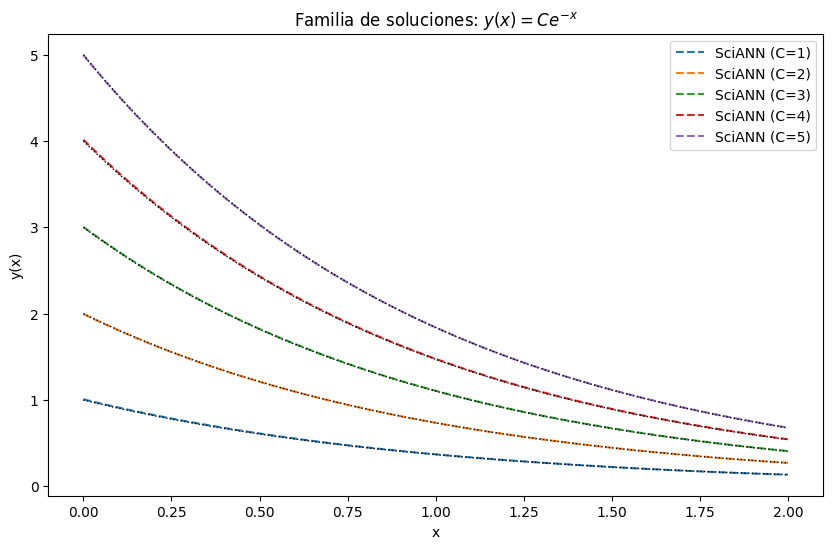

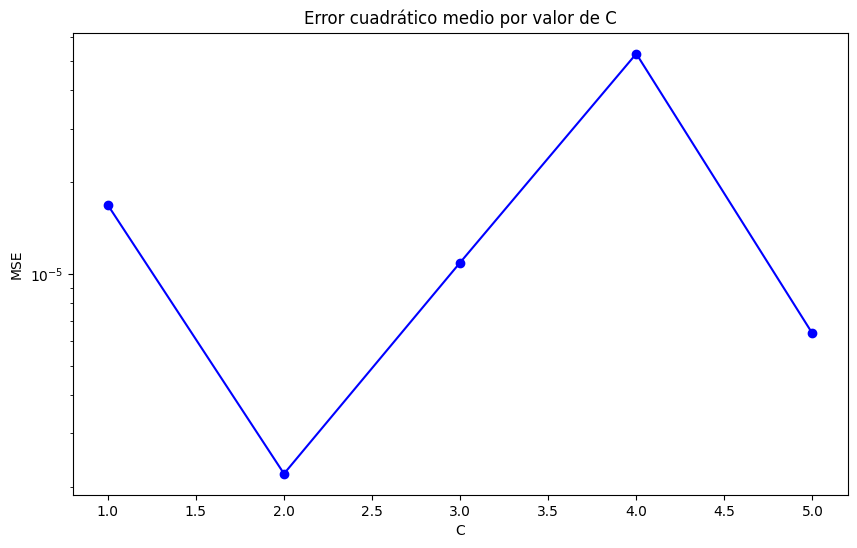

In [4]:
import sciann as sn
import numpy as np
import matplotlib.pyplot as plt

# Definir variables
x = sn.Variable('x', dtype='float32')
C = sn.Variable('C', dtype='float32')  # Constante para la familia de soluciones

# Red neuronal para aproximar y(x; C)
y = sn.Functional('y', [x, C], 4*[20], activation='tanh')

# Derivada dy/dx
dydx = sn.diff(y, x)

# Ecuación diferencial: dy/dx + y = 0
ode = dydx + y

# Condición inicial: y(0; C) = C
IC = (1 - sn.sign(x - 0.01)) * (y - C)

# Modelo
model = sn.SciModel(
    inputs=[x, C],
    targets=[ode, IC],
    loss_func="mse",
    optimizer="adam",
)

# Datos de entrenamiento (x ∈ [0, 2], C ∈ [0.5, 5])
x_train = np.linspace(0, 2, 100)
C_train = np.linspace(0.5, 5, 50)
X, Cc = np.meshgrid(x_train, C_train)
X_flat = X.reshape(-1, 1)
Cc_flat = Cc.reshape(-1, 1)

# Entrenamiento
model.train(
    [X_flat, Cc_flat],
    ['zeros', 'zeros'],
    epochs=500,
    batch_size=256,
    verbose=0
)

# Predicción para C = 1, 2, 3, 4, 5
x_test = np.linspace(0, 2, 100)
C_test = [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 6))
mse_values = []
for c in C_test:
    # Solución numérica con SciANN (asegurar formato 2D)
    x_input = x_test.reshape(-1, 1)
    c_input = (c * np.ones_like(x_test)).reshape(-1, 1)
    y_pred = y.eval(model, [x_input, c_input]).flatten()
    
    # Solución analítica
    y_exact = c * np.exp(-x_test)
    
    # Calcular MSE
    mse = np.mean((y_exact - y_pred)**2)
    mse_values.append(mse)
    print(f"MSE para C={c}: {mse:.4e}")
    
    # Gráficos
    plt.plot(x_test, y_pred, '--', label=f'SciANN (C={c})')
    plt.plot(x_test, y_exact, 'k:', linewidth=1)

plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Familia de soluciones: $y(x) = C e^{-x}$')
plt.legend()
plt.show()

# Opcional: Graficar MSE por C
plt.figure(figsize=(10, 6))
plt.plot(C_test, mse_values, 'bo-')
plt.xlabel('C')
plt.ylabel('MSE')
plt.title('Error cuadrático medio por valor de C')
plt.yscale('log')
plt.show()

---
# Ejemplo 3: Problema Stiff



Compiling model...
Building feed-forward neural network...
'build' took 0.079691 s

'compile' took 0.692288 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [2.17e+02, 1.04e+02, 1.00e+00, 0.00e+00]    [2.16e+02, 1.04e+02, 1.00e+00, 0.00e+00]    []  
1000      [1.75e-01, 2.05e-01, 1.34e-04, 9.20e-05]    [1.75e-01, 2.03e-01, 1.34e-04, 9.20e-05]    []  

Best model at step 1000:
  train loss: 3.80e-01
  test loss: 3.78e-01
  test metric: []

'train' took 3.072866 s

Compiling model...
'compile' took 0.457437 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
1000      [1.75e-01, 2.05e-01, 1.34e-04, 9.20e-05]    [1.75e-01, 2.03e-01, 1.34e-04, 9.20e-05]    []  
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  Objective function value: 0.379683
  Number of it

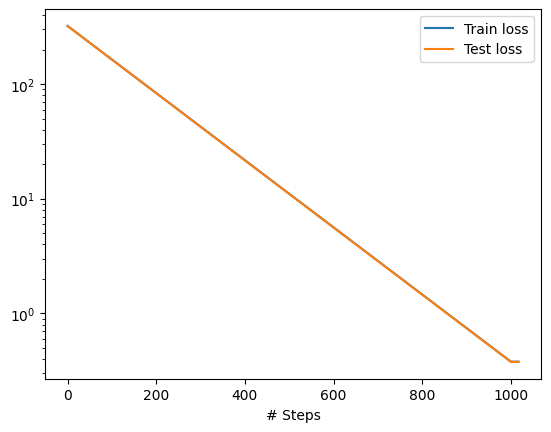

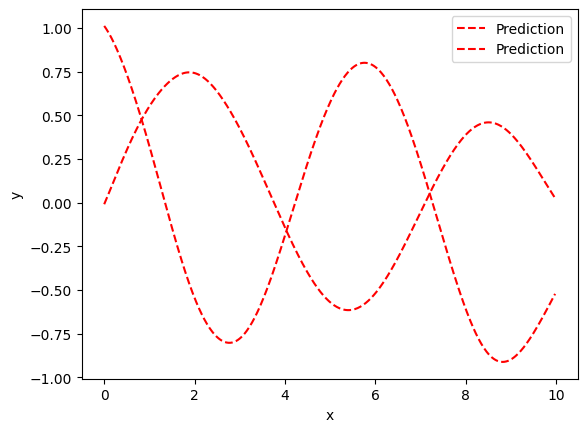

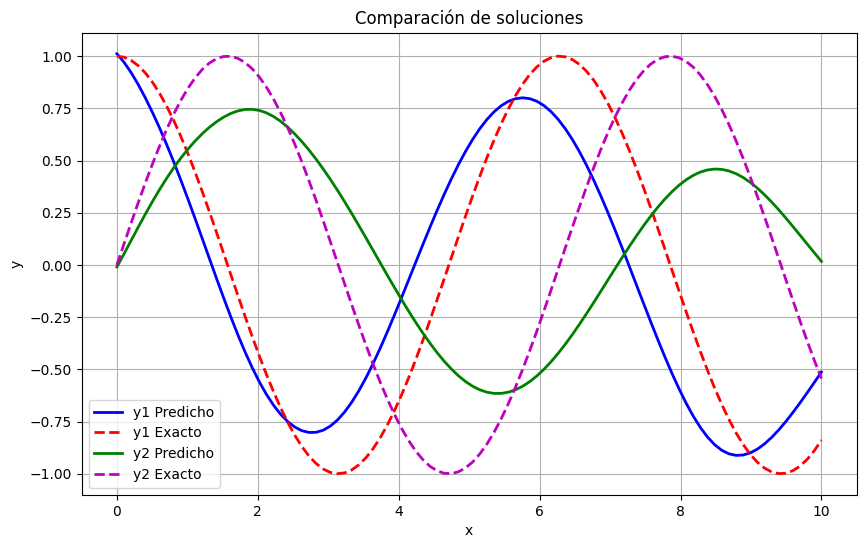

In [6]:
import deepxde as dde
import numpy as np
import tensorflow as tf

# Definir el sistema de ecuaciones diferenciales
def ode_system(x, y):
    y1 = y[:, 0:1]
    y2 = y[:, 1:2]
    
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    
    # Ecuaciones residuales
    eq1 = dy1_x - (-16*y1 + 12*y2 + 16*tf.cos(x) - 13*tf.sin(x))
    eq2 = dy2_x - (12*y1 - 9*y2 - 11*tf.cos(x) + 9*tf.sin(x))
    
    return [eq1, eq2]

# Condiciones iniciales corregidas
def boundary(_, on_initial):
    return on_initial

ic_y1 = dde.icbc.IC(
    geom, 
    lambda x: 1.0,  # y1(0) = 1
    boundary,
    component=0
)

ic_y2 = dde.icbc.IC(
    geom,
    lambda x: 0.0,  # y2(0) = 0
    boundary,
    component=1
)

# Dominio temporal
geom = dde.geometry.TimeDomain(0, 10)

# Configurar el problema PDE
data = dde.data.TimePDE(
    geom,
    ode_system,
    [ic_y1, ic_y2],  # Lista de condiciones iniciales
    num_domain=500,
    num_boundary=2,
    num_test=500
)

# Construir la red neuronal (sin cambios)
layer_size = [1] + [64] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

# Configurar y entrenar el modelo (sin cambios)
model = dde.Model(data, net)
model.compile("adam", lr=0.001)
losshistory, train_state = model.train(epochs=1000)
model.compile("L-BFGS")
losshistory, train_state = model.train()

# Resto del código igual...

# Guardar resultados
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# Comparar con solución analítica
x = np.linspace(0, 10, 100)[:, np.newaxis]
y_pred = model.predict(x)
y1_pred = y_pred[:, 0]
y2_pred = y_pred[:, 1]

# Solución exacta
y1_exact = np.cos(x[:, 0])
y2_exact = np.sin(x[:, 0])

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x, y1_pred, 'b-', linewidth=2, label='y1 Predicho')
plt.plot(x, y1_exact, 'r--', linewidth=2, label='y1 Exacto')
plt.plot(x, y2_pred, 'g-', linewidth=2, label='y2 Predicho')
plt.plot(x, y2_exact, 'm--', linewidth=2, label='y2 Exacto')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de soluciones')
plt.legend()
plt.grid(True)
plt.show()

Compiling model...
Building feed-forward neural network...
'build' took 0.090866 s

'compile' took 3.150998 s



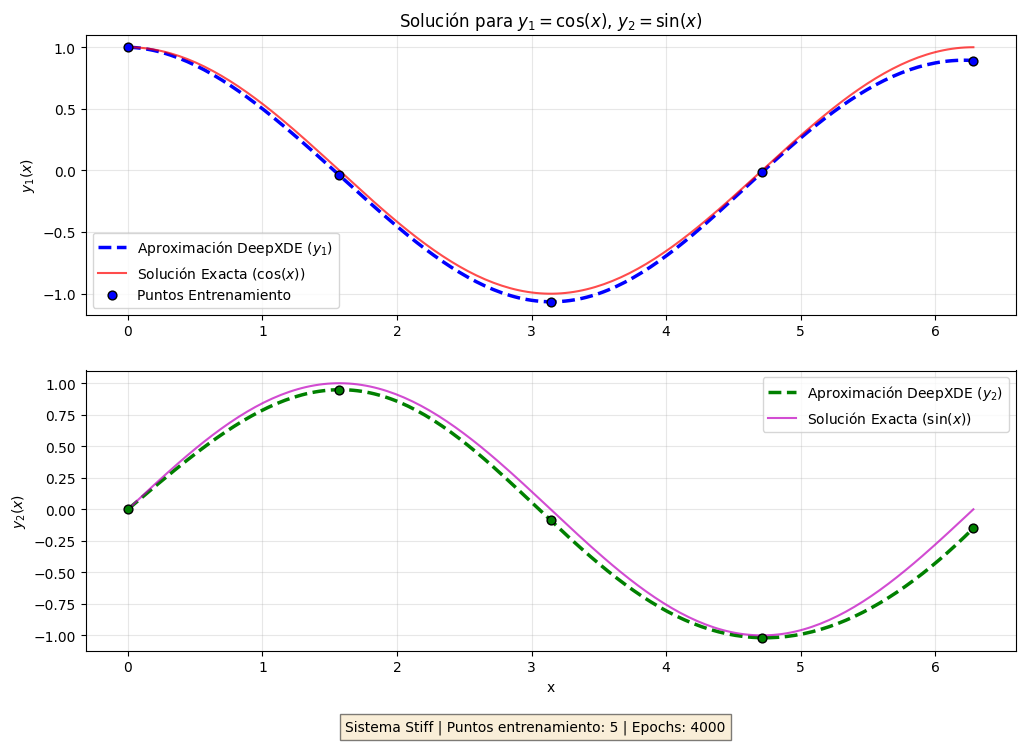

In [48]:
import deepxde as dde
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del sistema de ecuaciones stiff
def pde(x, y):
    y1, y2 = y[:, 0:1], y[:, 1:2]  # Separar las dos salidas
    
    # Derivadas
    dy1_dx = dde.grad.jacobian(y, x, i=0, j=0)
    dy2_dx = dde.grad.jacobian(y, x, i=1, j=0)
    
    # USAR FUNCIONES TENSORFLOW EN LUGAR DE NUMPY
    # Ecuaciones diferenciales
    eq1 = dy1_dx - (-16*y1 + 12*y2 + 16*tf.cos(x) - 13*tf.sin(x))
    eq2 = dy2_dx - (12*y1 - 9*y2 - 11*tf.cos(x) + 9*tf.sin(x))
    
    return [eq1, eq2]

# Transformación de salida para forzar condiciones iniciales
def output_transform(x, y):
    y1 = 1 + x * y[:, 0:1]  # Forzar y1(0) = 1
    y2 = 0 + x * y[:, 1:2]  # Forzar y2(0) = 0
    return tf.concat([y1, y2], axis=1)

# Dominio: x ∈ [0, 2π]
geom = dde.geometry.TimeDomain(0, 2*np.pi)

# Puntos de entrenamiento (más densos cerca de x=0)
# training_points = np.sort(np.concatenate([
#     np.linspace(0, 0.5, 15),         # Alta densidad cerca de x=0
#     np.linspace(0.5, 2*np.pi, 35)    # Menor densidad en el resto
# ]))[:, None]

training_points = np.sort(np.concatenate([
    np.linspace(0, 2 * np.pi, 5)    # Menor densidad en el resto
]))[:, None]

# Configuración de datos PDE
data = dde.data.PDE(
    geom,
    pde,
    [],  # Sin condiciones adicionales (transformación maneja ICs)
    num_domain=0,
    num_boundary=0,
    anchors=training_points,
)

# Arquitectura de red (1 entrada, 4 capas ocultas de 64 neuronas, 2 salidas)
net = dde.maps.FNN([1] + [64]*4 + [2], "swish", "Glorot normal")
net.apply_output_transform(output_transform)

# Compilación y entrenamiento
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# Entrenamiento con más épocas para sistema stiff
losshistory, train_state = model.train(
    epochs=4000,
    batch_size=len(training_points),
    display_every=500,
    callbacks=[dde.callbacks.EarlyStopping(min_delta=1e-6, patience=1000)],
    verbose=0
)

# Validación y gráficos
x_test = np.linspace(0, 2*np.pi, 200)[:, None]
y_pred = model.predict(x_test)

# Soluciones exactas
y1_exact = np.cos(x_test)
y2_exact = np.sin(x_test)

# Crear figura con 2 subgráficos
plt.figure(figsize=(12, 8))

# Gráfico para y1
plt.subplot(2, 1, 1)
plt.plot(x_test, y_pred[:, 0], 'b--', linewidth=2.5, label='Aproximación DeepXDE ($y_1$)')
plt.plot(x_test, y1_exact, 'r-', linewidth=1.5, alpha=0.7, label='Solución Exacta ($\cos(x)$)')
plt.scatter(training_points, model.predict(training_points)[:, 0], 
            c='blue', s=40, edgecolors='k', zorder=3, label='Puntos Entrenamiento')

plt.ylabel('$y_1(x)$')
plt.grid(alpha=0.3)
plt.legend()
plt.title('Solución para $y_1 = \cos(x)$, $y_2 = \sin(x)$')

# Gráfico para y2
plt.subplot(2, 1, 2)
plt.plot(x_test, y_pred[:, 1], 'g--', linewidth=2.5, label='Aproximación DeepXDE ($y_2$)')
plt.plot(x_test, y2_exact, 'm-', linewidth=1.5, alpha=0.7, label='Solución Exacta ($\sin(x)$)')
plt.scatter(training_points, model.predict(training_points)[:, 1], 
            c='green', s=40, edgecolors='k', zorder=3)

plt.xlabel('x')
plt.ylabel('$y_2(x)$')
plt.grid(alpha=0.3)
plt.legend()

# Añadir información del sistema
plt.figtext(0.5, 0.01, 
            f'Sistema Stiff | Puntos entrenamiento: {len(training_points)} | '
            f'Epochs: 4000',
            # f'Pérdida final: {losshistory.loss_train[-1][0]:.2e}',
            ha='center', fontsize=10, bbox=dict(facecolor='wheat', alpha=0.5))

# plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

2025-06-04 17:28:40.388092: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term

Compiling model...
Building feed-forward neural network...
'build' took 0.117132 s



2025-06-04 17:28:51.234416: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'compile' took 1.273310 s



2025-06-04 17:28:52.417200: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


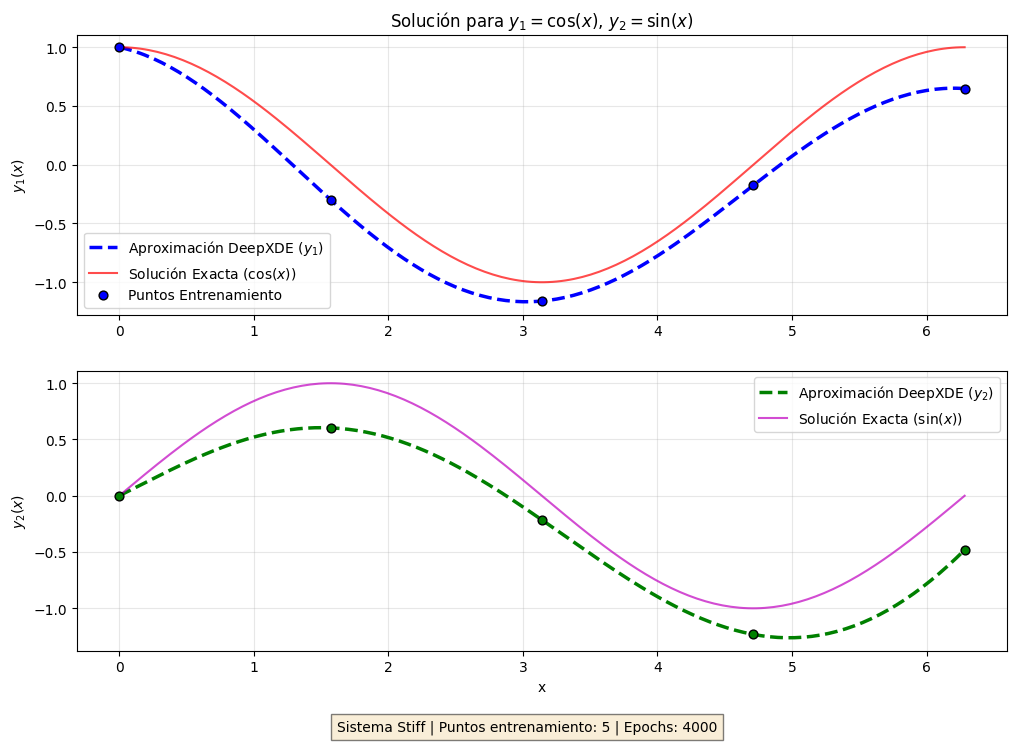

In [1]:
import deepxde as dde
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del sistema de ecuaciones stiff
def pde(x, y):
    y1, y2 = y[:, 0:1], y[:, 1:2]  # Separar las dos salidas
    
    # Derivadas
    dy1_dx = dde.grad.jacobian(y, x, i=0, j=0)
    dy2_dx = dde.grad.jacobian(y, x, i=1, j=0)
    
    # USAR FUNCIONES TENSORFLOW EN LUGAR DE NUMPY
    # Ecuaciones diferenciales
    eq1 = dy1_dx - (-16*y1 + 12*y2 + 16*tf.cos(x) - 13*tf.sin(x))
    eq2 = dy2_dx - (12*y1 - 9*y2 - 11*tf.cos(x) + 9*tf.sin(x))
    
    return [eq1, eq2]

# Transformación de salida para forzar condiciones iniciales
def output_transform(x, y):
    y1 = 1 + x * y[:, 0:1]  # Forzar y1(0) = 1
    y2 = 0 + x * y[:, 1:2]  # Forzar y2(0) = 0
    return tf.concat([y1, y2], axis=1)

# Dominio: x ∈ [0, 2π]
geom = dde.geometry.TimeDomain(0, 2*np.pi)

# Puntos de entrenamiento (más densos cerca de x=0)
# training_points = np.sort(np.concatenate([
#     np.linspace(0, 0.5, 15),         # Alta densidad cerca de x=0
#     np.linspace(0.5, 2*np.pi, 35)    # Menor densidad en el resto
# ]))[:, None]

training_points = np.sort(np.concatenate([
    np.linspace(0, 2 * np.pi, 5)    # Menor densidad en el resto
]))[:, None]

# Configuración de datos PDE
data = dde.data.PDE(
    geom,
    pde,
    [],  # Sin condiciones adicionales (transformación maneja ICs)
    num_domain=0,
    num_boundary=0,
    anchors=training_points,
)

# Arquitectura de red (1 entrada, 4 capas ocultas de 64 neuronas, 2 salidas)
net = dde.maps.FNN([1] + [64]*4 + [2], "swish", "Glorot normal")
net.apply_output_transform(output_transform)

# Compilación y entrenamiento
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# Entrenamiento con más épocas para sistema stiff
losshistory, train_state = model.train(
    epochs=4000,
    batch_size=len(training_points),
    display_every=500,
    callbacks=[dde.callbacks.EarlyStopping(min_delta=1e-6, patience=1000)],
    verbose=0
)

# Validación y gráficos
x_test = np.linspace(0, 2*np.pi, 200)[:, None]
y_pred = model.predict(x_test)

# Soluciones exactas
y1_exact = np.cos(x_test)
y2_exact = np.sin(x_test)

# Crear figura con 2 subgráficos
plt.figure(figsize=(12, 8))

# Gráfico para y1
plt.subplot(2, 1, 1)
plt.plot(x_test, y_pred[:, 0], 'b--', linewidth=2.5, label='Aproximación DeepXDE ($y_1$)')
plt.plot(x_test, y1_exact, 'r-', linewidth=1.5, alpha=0.7, label='Solución Exacta ($\cos(x)$)')
plt.scatter(training_points, model.predict(training_points)[:, 0], 
            c='blue', s=40, edgecolors='k', zorder=3, label='Puntos Entrenamiento')

plt.ylabel('$y_1(x)$')
plt.grid(alpha=0.3)
plt.legend()
plt.title('Solución para $y_1 = \cos(x)$, $y_2 = \sin(x)$')

# Gráfico para y2
plt.subplot(2, 1, 2)
plt.plot(x_test, y_pred[:, 1], 'g--', linewidth=2.5, label='Aproximación DeepXDE ($y_2$)')
plt.plot(x_test, y2_exact, 'm-', linewidth=1.5, alpha=0.7, label='Solución Exacta ($\sin(x)$)')
plt.scatter(training_points, model.predict(training_points)[:, 1], 
            c='green', s=40, edgecolors='k', zorder=3)

plt.xlabel('x')
plt.ylabel('$y_2(x)$')
plt.grid(alpha=0.3)
plt.legend()

# Añadir información del sistema
plt.figtext(0.5, 0.01, 
            f'Sistema Stiff | Puntos entrenamiento: {len(training_points)} | '
            f'Epochs: 4000',
            # f'Pérdida final: {losshistory.loss_train[-1][0]:.2e}',
            ha='center', fontsize=10, bbox=dict(facecolor='wheat', alpha=0.5))

# plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

Compiling model...
Building feed-forward neural network...
'build' took 0.109413 s

'compile' took 1.195213 s



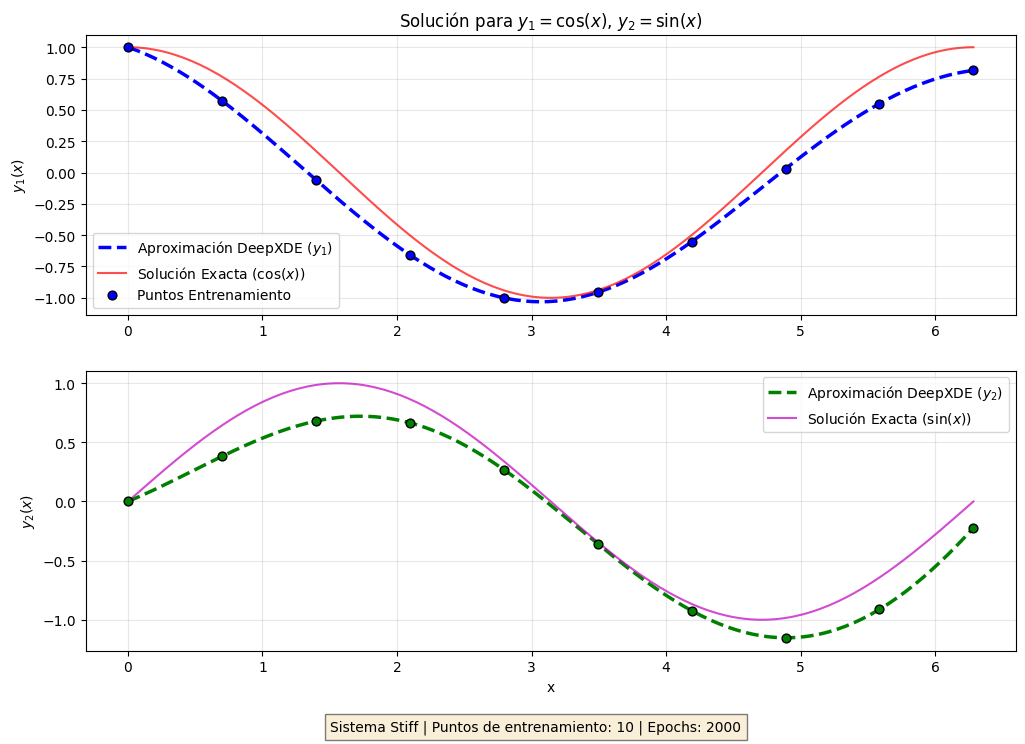

In [2]:
import deepxde as dde
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del sistema de ecuaciones stiff
def pde(x, y):
    y1, y2 = y[:, 0:1], y[:, 1:2]  # Separar las dos salidas
    
    # Derivadas
    dy1_dx = dde.grad.jacobian(y, x, i=0, j=0)
    dy2_dx = dde.grad.jacobian(y, x, i=1, j=0)
    
    # USAR FUNCIONES TENSORFLOW EN LUGAR DE NUMPY
    # Ecuaciones diferenciales
    eq1 = dy1_dx - (-16*y1 + 12*y2 + 16*tf.cos(x) - 13*tf.sin(x))
    eq2 = dy2_dx - (12*y1 - 9*y2 - 11*tf.cos(x) + 9*tf.sin(x))
    
    return [eq1, eq2]

# Transformación de salida para forzar condiciones iniciales
def output_transform(x, y):
    y1 = 1 + x * y[:, 0:1]  # Forzar y1(0) = 1
    y2 = 0 + x * y[:, 1:2]  # Forzar y2(0) = 0
    return tf.concat([y1, y2], axis=1)

# Dominio: x ∈ [0, 2π]
geom = dde.geometry.TimeDomain(0, 2*np.pi)

# Puntos de entrenamiento (más densos cerca de x=0)
# training_points = np.sort(np.concatenate([
#     np.linspace(0, 0.5, 15),         # Alta densidad cerca de x=0
#     np.linspace(0.5, 2*np.pi, 35)    # Menor densidad en el resto
# ]))[:, None]

training_points = np.sort(np.concatenate([
    np.linspace(0, 2 * np.pi, 10)
]))[:, None]

# Configuración de datos PDE
data = dde.data.PDE(
    geom,
    pde,
    [],  # Sin condiciones adicionales (transformación maneja ICs)
    num_domain=0,
    num_boundary=0,
    anchors=training_points,
)

# Arquitectura de red (1 entrada, 4 capas ocultas de 64 neuronas, 2 salidas)
net = dde.maps.FNN([1] + [64]*4 + [2], "swish", "Glorot normal")
net.apply_output_transform(output_transform)

# Compilación y entrenamiento
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# Entrenamiento con más épocas para sistema stiff
losshistory, train_state = model.train(
    epochs=2000,
    batch_size=len(training_points),
    display_every=500,
    callbacks=[dde.callbacks.EarlyStopping(min_delta=1e-6, patience=1000)],
    verbose=0
)

# Validación y gráficos
x_test = np.linspace(0, 2*np.pi, 200)[:, None]
y_pred = model.predict(x_test)

# Soluciones exactas
y1_exact = np.cos(x_test)
y2_exact = np.sin(x_test)

# Crear figura con 2 subgráficos
plt.figure(figsize=(12, 8))

# Gráfico para y1
plt.subplot(2, 1, 1)
plt.plot(x_test, y_pred[:, 0], 'b--', linewidth=2.5, label='Aproximación DeepXDE ($y_1$)')
plt.plot(x_test, y1_exact, 'r-', linewidth=1.5, alpha=0.7, label='Solución Exacta ($\cos(x)$)')
plt.scatter(training_points, model.predict(training_points)[:, 0], 
            c='blue', s=40, edgecolors='k', zorder=3, label='Puntos Entrenamiento')

plt.ylabel('$y_1(x)$')
plt.grid(alpha=0.3)
plt.legend()
plt.title('Solución para $y_1 = \cos(x)$, $y_2 = \sin(x)$')

# Gráfico para y2
plt.subplot(2, 1, 2)
plt.plot(x_test, y_pred[:, 1], 'g--', linewidth=2.5, label='Aproximación DeepXDE ($y_2$)')
plt.plot(x_test, y2_exact, 'm-', linewidth=1.5, alpha=0.7, label='Solución Exacta ($\sin(x)$)')
plt.scatter(training_points, model.predict(training_points)[:, 1], 
            c='green', s=40, edgecolors='k', zorder=3)

plt.xlabel('x')
plt.ylabel('$y_2(x)$')
plt.grid(alpha=0.3)
plt.legend()

# Añadir información del sistema
plt.figtext(0.5, 0.01, 
            f'Sistema Stiff | Puntos de entrenamiento: {len(training_points)} | '
            f'Epochs: 2000',
            # f'Pérdida final: {losshistory.loss_train[-1][0]:.2e}',
            ha='center', fontsize=10, bbox=dict(facecolor='wheat', alpha=0.5))

# plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

In [3]:
!pip show tensorflow

Name: tensorflow
Version: 2.10.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/miniconda3/envs/sci/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [5]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 256.0 kB/s eta 0:00:00a 0:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]


## Ejemplo 4: Sistema de Lorenz



In [6]:
import deepxde as dde
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go
from scipy.integrate import solve_ivp

# ======================
# PARÁMETROS AJUSTABLES
# ======================
# Parámetros del sistema de Lorenz
sigma = 10.0
rho = 28.0
beta = 8.0/3.0

# Condiciones iniciales
x0, y0, z0 = [1.0, 1.0, 1.0]

# Configuración de entrenamiento
epochs = 20000
learning_rate = 0.001
num_train_points = 200  # Puntos de entrenamiento en el dominio temporal
num_test_points = 1000  # Puntos para evaluación
T = 20.0  # Tiempo final

# Arquitectura de la red
num_layers = 4
num_neurons = 50
activation = "swish"
initializer = "Glorot normal"

# ======================
# DEFINICIÓN DEL SISTEMA
# ======================
# Geometría (dominio temporal)
# ======================
# DEFINICIÓN DEL SISTEMA (CORREGIDO)
# ======================
# Geometría (dominio temporal)
geom = dde.geometry.TimeDomain(0, T)

# Sistema de ecuaciones de Lorenz (mejorado)
def lorenz_system(t, state):
    x, y, z = state[:, 0:1], state[:, 1:2], state[:, 2:3]
    
    dx_dt = dde.grad.jacobian(state, t, i=0)
    dy_dt = dde.grad.jacobian(state, t, i=1)
    dz_dt = dde.grad.jacobian(state, t, i=2)
    
    eq1 = dx_dt - sigma * (y - x)
    eq2 = dy_dt - (x * (rho - z) - y)
    eq3 = dz_dt - (x * y - beta * z)
    
    return tf.concat([eq1, eq2, eq3], axis=1)

# Condición inicial CORREGIDA
def initial_condition(t):
    return tf.concat([
        x0 * tf.ones((tf.shape(t)[0], 1)), 
        y0 * tf.ones((tf.shape(t)[0], 1)), 
        z0 * tf.ones((tf.shape(t)[0], 1))
    ], axis=1)

ic = dde.icbc.IC(
    geom,
    initial_condition,
    lambda _, on_initial: on_initial
)

# Configuración del problema PDE
data = dde.data.PDE(
    geom,
    lorenz_system,
    ic,
    num_domain=num_train_points,
    num_test=num_test_points
)

# ======================
# CONSTRUCCIÓN DEL MODELO
# ======================
# Red neuronal (1 entrada [t], 3 salidas [x,y,z])
net = dde.maps.FNN(
    [1] + [num_neurons] * num_layers + [3],
    activation,
    initializer
)

model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# Entrenamiento
losshistory, train_state = model.train(
    epochs=epochs,
    display_every=1000
)

# ======================
# SOLUCIÓN DE REFERENCIA
# ======================
def exact_solution(t):
    def lorenz_ode(t, state):
        x, y, z = state
        dxdt = sigma * (y - x)
        dydt = x * (rho - z) - y
        dzdt = x * y - beta * z
        return [dxdt, dydt, dzdt]
    
    sol = solve_ivp(
        lorenz_ode,
        [0, T],
        [x0, y0, z0],
        t_eval=np.linspace(0, T, num_test_points))
    return sol.y.T

# ======================
# PREDICCIÓN DEL MODELO
# ======================
t_test = np.linspace(0, T, num_test_points)[:, None]
pred = model.predict(t_test)
x_pred, y_pred, z_pred = pred[:, 0], pred[:, 1], pred[:, 2]

# Solución exacta
exact = exact_solution(t_test)
x_exact, y_exact, z_exact = exact[:, 0], exact[:, 1], exact[:, 2]

# ======================
# VISUALIZACIÓN CON PLOTLY
# ======================
# Atractor de Lorenz aproximado
fig_pred = go.Figure(data=[go.Scatter3d(
    x=x_pred,
    y=y_pred,
    z=z_pred,
    mode='lines',
    line=dict(width=2, color='blue'),
    name='Aproximación DeepXDE')
])

# Atractor de Lorenz exacto
fig_exact = go.Figure(data=[go.Scatter3d(
    x=x_exact,
    y=y_exact,
    z=z_exact,
    mode='lines',
    line=dict(width=1, color='red'),
    name='Solución Exacta')
])

# Combinar ambas gráficas
fig = go.Figure(data=fig_pred.data + fig_exact.data)
fig.update_layout(
    title=f'Atractor de Lorenz (Epochs: {epochs}, Puntos: {num_train_points})',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        camera=dict(eye=dict(x=-1.5, y=1.5, z=0.5))
))

fig.show()

# Graficar componentes individuales
fig_components = go.Figure()
fig_components.add_trace(go.Scatter(
    x=t_test.flatten(),
    y=x_pred,
    name='X (Pred)',
    line=dict(color='blue', width=2)
))
fig_components.add_trace(go.Scatter(
    x=t_test.flatten(),
    y=x_exact,
    name='X (Exact)',
    line=dict(color='red', width=1, dash='dash')
))
fig_components.add_trace(go.Scatter(
    x=t_test.flatten(),
    y=y_pred,
    name='Y (Pred)',
    line=dict(color='green', width=2)
))
fig_components.add_trace(go.Scatter(
    x=t_test.flatten(),
    y=y_exact,
    name='Y (Exact)',
    line=dict(color='orange', width=1, dash='dash')
))
fig_components.update_layout(
    title='Componentes Temporales',
    xaxis_title='Tiempo',
    yaxis_title='Valor'
)
fig_components.show()

Compiling model...
Building feed-forward neural network...
'build' took 0.116280 s



RuntimeError: IC function should return an array of shape N by 1 for each component.Use argument 'component' for different output components.

---
# Referencias

## Documentación

<!-- * SciANN Documentation (https://www.sciann.com/) -->

* DeepXDE | https://deepxde.readthedocs.io/en/latest/

* NeuralPDE.jl | https://docs.sciml.ai/NeuralPDE/stable/

## Artículos

<!-- * E. Haghighat, R. Juanes, _SciANN: A Keras/TensorFlow wrapper for scientific computations and physics-informed deep learning using artificial neural networks_ (https://www.sciencedirect.com/science/article/abs/pii/S0045782520307374) -->

* Lu Lu, et al., _DeepXDE: A deep learning library for solving differential equations_ (https://arxiv.org/abs/1907.04502)

* Kirill Zubov, et al., _NeuralPDE: Automating Physics-Informed Neural Networks (PINNs) with Error Approximations_ (https://arxiv.org/abs/2107.09443)